<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

In [1]:
# import the packages
# Data manipulation
import numpy as np
import pandas as pd
import sklearn
import feature_engine

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler

# feature engine
import feature_engine.imputation as mdi
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder, RareLabelEncoder, CountFrequencyEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser, EqualWidthDiscretiser
from feature_engine.outliers import Winsorizer
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import YeoJohnsonTransformer, PowerTransformer, BoxCoxTransformer

# plotting
import scipy.stats as stats # for Q-Q
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn import ensemble

### Step 1: Load and Explore the Data

In [2]:
# Load the tables (FINAL SET: 23): Based on Data Exploration Results + Previous Test Results 22)
results_data = pd.read_csv('data/results_mod.csv')
circuit_data = pd.read_csv('data/circuits_mod.csv')
races_data = pd.read_csv('data/races_mod.csv')
driver_standings_data = pd.read_csv('data/driver_standings_mod.csv')
pitstops_data = pd.read_csv('data/pit_stops_mod.csv')
constructor_data = pd.read_csv('data/constructors_mod.csv')
qualifying_data = pd.read_csv('data/qualifying_mod.csv')
constructor_standings_data = pd.read_csv('data/constructor_standings_mod.csv')
lap_times_data = pd.read_csv('data/lap_times_mod.csv')
drivers_data = pd.read_csv('data/drivers_mod.csv')

In [3]:
# Observe the data (First 10 rows, info, describe)
# results_data
results_data.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1
5,6,18,6,3,8,13,6,6,6,3.0,57,\N,\N,50,14,01:29.6,212.974,11
6,7,18,7,5,14,17,7,7,7,2.0,55,\N,\N,22,12,01:29.5,213.224,5
7,8,18,8,6,1,15,8,8,8,1.0,53,\N,\N,20,4,01:27.9,217.18,5
8,9,18,9,2,4,2,\N,R,9,0.0,47,\N,\N,15,9,01:28.8,215.1,4
9,10,18,10,7,12,18,\N,R,10,0.0,43,\N,\N,23,13,01:29.6,213.166,3


In [4]:
# Info & describe
results_data.info()
results_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25399 non-null  int64  
 1   raceId           25399 non-null  int64  
 2   driverId         25399 non-null  int64  
 3   constructorId    25399 non-null  int64  
 4   number           25399 non-null  object 
 5   grid             25399 non-null  int64  
 6   position         25399 non-null  object 
 7   positionText     25399 non-null  object 
 8   positionOrder    25399 non-null  int64  
 9   points           25399 non-null  float64
 10  laps             25399 non-null  int64  
 11  time             25399 non-null  object 
 12  milliseconds     25399 non-null  object 
 13  fastestLap       25399 non-null  object 
 14  rank             25399 non-null  object 
 15  fastestLapTime   25399 non-null  object 
 16  fastestLapSpeed  25399 non-null  object 
 17  statusId    

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,25399.000000,25399.000000,25399.000000,25399.000000,25399.000000,25399.000000,25399.000000,25399.000000,25399.000000
mean,12700.761999,521.818576,253.809914,47.809993,11.198000,13.186976,1.822082,45.849443,17.666522
std,7333.289896,292.937855,261.237589,58.784504,7.264033,8.932839,4.075745,29.962512,26.075967
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6350.500000,289.000000,56.000000,6.000000,5.000000,7.000000,0.000000,21.000000,1.000000
50%,12700.000000,506.000000,160.000000,25.000000,11.000000,13.000000,0.000000,52.000000,11.000000
75%,19049.500000,768.000000,353.500000,58.000000,17.000000,19.000000,2.000000,66.000000,14.000000
max,25404.000000,1073.000000,854.000000,214.000000,34.000000,99.000000,50.000000,200.000000,139.000000


In [5]:
# circuit_data
circuit_data.head(10)

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
5,6,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.73470,7.42056,7,http://en.wikipedia.org/wiki/Circuit_de_Monaco
6,7,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada,45.50000,-73.52280,13,http://en.wikipedia.org/wiki/Circuit_Gilles_Vi...
7,8,magny_cours,Circuit de Nevers Magny-Cours,Magny Cours,France,46.86420,3.16361,228,http://en.wikipedia.org/wiki/Circuit_de_Nevers...
8,9,silverstone,Silverstone Circuit,Silverstone,UK,52.07860,-1.01694,153,http://en.wikipedia.org/wiki/Silverstone_Circuit
9,10,hockenheimring,Hockenheimring,Hockenheim,Germany,49.32780,8.56583,103,http://en.wikipedia.org/wiki/Hockenheimring


In [6]:
circuit_data.info()
circuit_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   79 non-null     int64  
 1   circuitRef  79 non-null     object 
 2   name        79 non-null     object 
 3   location    79 non-null     object 
 4   country     79 non-null     object 
 5   lat         79 non-null     float64
 6   lng         79 non-null     float64
 7   alt         79 non-null     object 
 8   url         79 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.7+ KB


,circuitId,lat,lng
count,79.000000,79.000000,79.000000
mean,40.000000,33.517913,3.097033
std,22.949219,22.626026,64.963691
min,1.000000,-37.849700,-118.189000
25%,20.500000,32.058150,-9.298615
50%,40.000000,40.951700,4.326940
75%,59.500000,47.081400,23.561100
max,79.000000,57.265300,144.968000


In [7]:
# driver_standings_data
driver_standings_data.head(10)

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10,1,1,1
1,2,18,2,8,2,2,0
2,3,18,3,6,3,3,0
3,4,18,4,5,4,4,0
4,5,18,5,4,5,5,0
5,6,18,6,3,6,6,0
6,7,18,7,2,7,7,0
7,8,18,8,1,8,8,0
8,9,19,1,14,1,1,1
9,10,19,2,11,3,3,0


In [8]:
driver_standings_data.info()
driver_standings_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33394 entries, 0 to 33393
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   driverStandingsId  33394 non-null  int64 
 1   raceId             33394 non-null  int64 
 2   driverId           33394 non-null  int64 
 3   points             33389 non-null  object
 4   position           33394 non-null  int64 
 5   positionText       33394 non-null  object
 6   wins               33394 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


,driverStandingsId,raceId,driverId,position,wins
count,33394.000000,33394.000000,33394.000000,33394.000000,33394.000000
mean,41053.589327,562.539977,298.800114,20.077289,0.265407
std,21717.997691,276.659109,259.756294,16.499785,0.974147
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,19061.250000,342.000000,84.000000,8.000000,0.000000
50%,48903.500000,587.000000,212.000000,16.000000,0.000000
75%,57992.750000,789.000000,484.000000,26.000000,0.000000
max,70780.000000,1074.000000,855.000000,108.000000,13.000000


In [9]:
# pitstops_data
pitstops_data.head(10)

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
5,841,22,1,13,17:24:29,23.643,23643
6,841,20,1,14,17:25:17,22.603,22603
7,841,814,1,14,17:26:03,24.863,24863
8,841,816,1,14,17:26:50,25.259,25259
9,841,67,1,15,17:27:34,25.342,25342


In [10]:
pitstops_data.info()
pitstops_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8828 entries, 0 to 8827
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        8828 non-null   int64 
 1   driverId      8828 non-null   int64 
 2   stop          8828 non-null   int64 
 3   lap           8828 non-null   int64 
 4   time          8828 non-null   object
 5   duration      8828 non-null   object
 6   milliseconds  8828 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 482.9+ KB


,raceId,driverId,stop,lap,milliseconds
count,8828.000000,8828.000000,8828.000000,8828.000000,8.828000e+03
mean,944.363049,493.641482,1.768237,25.118034,6.782700e+04
std,69.248219,394.313670,0.923481,14.503790,2.488059e+05
min,841.000000,1.000000,1.000000,1.000000,1.289700e+04
25%,882.000000,17.000000,1.000000,13.000000,2.190300e+04
50%,942.000000,814.000000,2.000000,25.000000,2.352500e+04
75%,1002.000000,828.000000,2.000000,35.000000,2.613200e+04
max,1073.000000,854.000000,6.000000,78.000000,2.077164e+06


In [11]:
# constructor_data
constructor_data.head(10)

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
5,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
6,7,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing
7,8,super_aguri,Super Aguri,Japanese,http://en.wikipedia.org/wiki/Super_Aguri_F1
8,9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing
9,10,force_india,Force India,Indian,http://en.wikipedia.org/wiki/Racing_Point_Forc...


In [12]:
constructor_data.info()
constructor_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


,constructorId
count,211.000000
mean,107.037915
std,61.653629
min,1.000000
25%,54.500000
50%,107.000000
75%,159.500000
max,214.000000


In [13]:
# qualifying_data
qualifying_data.head(10)

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
5,6,18,15,7,11,6,1:26.427,1:26.101,1:28.527
6,7,18,3,3,7,7,1:26.295,1:26.059,1:28.687
7,8,18,14,9,9,8,1:26.381,1:26.063,1:29.041
8,9,18,10,7,12,9,1:26.919,1:26.164,1:29.593
9,10,18,20,5,15,10,1:26.702,1:25.842,\N


In [14]:
qualifying_data.info()
qualifying_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9135 entries, 0 to 9134
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9135 non-null   int64 
 1   raceId         9135 non-null   int64 
 2   driverId       9135 non-null   int64 
 3   constructorId  9135 non-null   int64 
 4   number         9135 non-null   int64 
 5   position       9135 non-null   int64 
 6   q1             9127 non-null   object
 7   q2             9001 non-null   object
 8   q3             8880 non-null   object
dtypes: int64(6), object(3)
memory usage: 642.4+ KB


,qualifyId,raceId,driverId,constructorId,number,position
count,9135.000000,9135.000000,9135.000000,9135.000000,9135.000000,9135.000000
mean,4576.769239,552.458128,283.504324,41.008320,17.525342,11.300383
std,2647.355274,412.885951,369.432092,67.887418,17.370068,6.324415
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2285.500000,111.000000,15.000000,4.000000,7.000000,6.000000
50%,4570.000000,842.000000,44.000000,9.000000,14.000000,11.000000
75%,6873.500000,956.000000,815.000000,23.000000,21.000000,17.000000
max,9175.000000,1073.000000,854.000000,214.000000,99.000000,28.000000


In [15]:
# constructor_standings_data
constructor_standings_data.head(10)

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
5,6,18,6,1.0,6,6,0
6,7,19,1,24.0,1,1,1
7,8,19,2,19.0,2,2,0
8,9,19,3,9.0,4,4,0
9,10,19,4,6.0,5,5,0


In [16]:
constructor_standings_data.info()
constructor_standings_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12716 entries, 0 to 12715
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12716 non-null  int64  
 1   raceId                  12716 non-null  int64  
 2   constructorId           12716 non-null  int64  
 3   points                  12716 non-null  float64
 4   position                12716 non-null  int64  
 5   positionText            12716 non-null  object 
 6   wins                    12716 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 695.5+ KB


,constructorStandingsId,raceId,constructorId,points,position,wins
count,12716.000000,12716.000000,12716.000000,12716.000000,12716.000000,12716.000000
mean,15990.742529,505.302218,47.262504,32.244299,7.315901,0.671044
std,8748.089506,285.123256,58.451136,73.503280,4.402105,1.788436
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,8449.750000,291.000000,6.000000,0.000000,4.000000,0.000000
50%,19547.500000,487.000000,25.000000,6.000000,7.000000,0.000000
75%,24168.250000,702.000000,57.000000,29.125000,10.000000,0.000000
max,27942.000000,1074.000000,214.000000,765.000000,22.000000,19.000000


In [17]:
# lap_times_data
lap_times_data.head(10)

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
5,841,20,6,1,1:32.605,92605
6,841,20,7,1,1:32.502,92502
7,841,20,8,1,1:32.537,92537
8,841,20,9,1,1:33.240,93240
9,841,20,10,1,1:32.572,92572


In [18]:
lap_times_data.info()
lap_times_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514592 entries, 0 to 514591
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        514592 non-null  int64 
 1   driverId      514592 non-null  int64 
 2   lap           514592 non-null  int64 
 3   position      514592 non-null  int64 
 4   time          514592 non-null  object
 5   milliseconds  514592 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ MB


,raceId,driverId,lap,position,milliseconds
count,514592.000000,514592.000000,514592.000000,514592.000000,5.145920e+05
mean,526.829587,265.752592,29.962442,9.650134,9.560792e+04
std,415.885396,364.650842,18.419473,5.546670,7.388613e+04
min,1.000000,1.000000,1.000000,1.000000,5.540400e+04
25%,122.000000,15.000000,14.000000,5.000000,8.204800e+04
50%,346.000000,35.000000,29.000000,9.000000,9.065500e+04
75%,951.000000,815.000000,44.000000,14.000000,1.023210e+05
max,1073.000000,854.000000,87.000000,24.000000,7.507547e+06


In [19]:
# drivers_data
drivers_data.head(10)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,7/1/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,10/5/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,27/6/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,29/7/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
5,6,nakajima,\N,NAK,Kazuki,Nakajima,11/1/1985,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
6,7,bourdais,\N,BOU,Sébastien,Bourdais,28/2/1979,French,http://en.wikipedia.org/wiki/S%C3%A9bastien_Bo...
7,8,raikkonen,7,RAI,Kimi,Räikkönen,17/10/1979,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
8,9,kubica,88,KUB,Robert,Kubica,7/12/1984,Polish,http://en.wikipedia.org/wiki/Robert_Kubica
9,10,glock,\N,GLO,Timo,Glock,18/3/1982,German,http://en.wikipedia.org/wiki/Timo_Glock


In [20]:
drivers_data.info()
drivers_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     854 non-null    int64 
 1   driverRef    854 non-null    object
 2   number       854 non-null    object
 3   code         854 non-null    object
 4   forename     854 non-null    object
 5   surname      854 non-null    object
 6   dob          854 non-null    object
 7   nationality  854 non-null    object
 8   url          854 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB


,driverId
count,854.000000
mean,427.553864
std,246.761270
min,1.000000
25%,214.250000
50%,427.500000
75%,640.750000
max,855.000000


### Step 2: Data Wrangling on multiple tables 

In [21]:
# Wrangling on results_data
results_data.nunique()

resultId           25399
raceId              1057
driverId             853
constructorId        210
number               130
grid                  35
position              35
positionText          40
positionOrder         40
points                40
laps                 172
time                6527
milliseconds        6772
fastestLap            80
rank                  26
fastestLapTime       590
fastestLapSpeed     6557
statusId             135
dtype: int64

In [22]:
# Remove not classified values from milliseconds
results_data.milliseconds
results_data_n = results_data [results_data.milliseconds != '\\N']
results_data_n.info()
results_data_n.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6808 entries, 0 to 25390
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         6808 non-null   int64  
 1   raceId           6808 non-null   int64  
 2   driverId         6808 non-null   int64  
 3   constructorId    6808 non-null   int64  
 4   number           6808 non-null   object 
 5   grid             6808 non-null   int64  
 6   position         6808 non-null   object 
 7   positionText     6808 non-null   object 
 8   positionOrder    6808 non-null   int64  
 9   points           6808 non-null   float64
 10  laps             6808 non-null   int64  
 11  time             6808 non-null   object 
 12  milliseconds     6808 non-null   object 
 13  fastestLap       6808 non-null   object 
 14  rank             6808 non-null   object 
 15  fastestLapTime   6808 non-null   object 
 16  fastestLapSpeed  6808 non-null   object 
 17  statusId     

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1


In [23]:
# convert variable to float or int
results_data_n['milliseconds'] = results_data_n['milliseconds'].astype(float)
results_data_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6808 entries, 0 to 25390
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         6808 non-null   int64  
 1   raceId           6808 non-null   int64  
 2   driverId         6808 non-null   int64  
 3   constructorId    6808 non-null   int64  
 4   number           6808 non-null   object 
 5   grid             6808 non-null   int64  
 6   position         6808 non-null   object 
 7   positionText     6808 non-null   object 
 8   positionOrder    6808 non-null   int64  
 9   points           6808 non-null   float64
 10  laps             6808 non-null   int64  
 11  time             6808 non-null   object 
 12  milliseconds     6808 non-null   float64
 13  fastestLap       6808 non-null   object 
 14  rank             6808 non-null   object 
 15  fastestLapTime   6808 non-null   object 
 16  fastestLapSpeed  6808 non-null   object 
 17  statusId     

C:\Users\user\AppData\Local\Temp/ipykernel_18132/829897371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_data_n['milliseconds'] = results_data_n['milliseconds'].astype(float)


In [24]:
results_data_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6808 entries, 0 to 25390
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         6808 non-null   int64  
 1   raceId           6808 non-null   int64  
 2   driverId         6808 non-null   int64  
 3   constructorId    6808 non-null   int64  
 4   number           6808 non-null   object 
 5   grid             6808 non-null   int64  
 6   position         6808 non-null   object 
 7   positionText     6808 non-null   object 
 8   positionOrder    6808 non-null   int64  
 9   points           6808 non-null   float64
 10  laps             6808 non-null   int64  
 11  time             6808 non-null   object 
 12  milliseconds     6808 non-null   float64
 13  fastestLap       6808 non-null   object 
 14  rank             6808 non-null   object 
 15  fastestLapTime   6808 non-null   object 
 16  fastestLapSpeed  6808 non-null   object 
 17  statusId     

In [25]:
print(results_data.shape)
print(results_data_n.shape)

(25399, 18)
(6808, 18)


In [26]:
# Create new Driver Name column
drivers_data['driver_name'] = drivers_data['forename'] +" "+ drivers_data['surname']
drivers_data.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,driver_name
0,1,hamilton,44,HAM,Lewis,Hamilton,7/1/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,10/5/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,27/6/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg,Nico Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,29/7/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Heikki Kovalainen


In [27]:
# Rename Columns (n = new) 
# Prevent duplicate columns
circuit_data_n = circuit_data.rename(columns={'name':'circuit_name'})
races_data_n = races_data.rename(columns={'name':'race_name'})
driver_standings_data_n = driver_standings_data.rename(columns={'points':'driver_points'})
results_data_n = results_data_n.rename(columns={'milliseconds': 'finish_milliseconds'})
pitstops_data_n = pitstops_data.rename(columns={'milliseconds': 'pitstop_milliseconds', 'time':'stop_time'})
drivers_data_n = drivers_data.rename(columns={'nationality': 'driver_nationality'})
constructor_data_n = constructor_data.rename(columns={'nationality': 'constructor_nationality', 'name':'constructor_name'})
qualifying_data_n = qualifying_data.rename(columns={'position': 'qualifying_position'})
constructor_standings_data_n = constructor_standings_data.rename(columns={'points':'constructor_points', 'position':'constructor_position','wins':'constructor_wins'})
lap_times_data_n = lap_times_data.rename(columns={'position': 'lap_position', 'milliseconds':'lap_milliseconds'})

In [28]:
# Join Dataframes 
data = pd.merge(results_data_n, races_data_n[['raceId','circuitId','round','race_name','date']], how='inner', left_on=['raceId'], right_on=['raceId'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6808 entries, 0 to 6807
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   resultId             6808 non-null   int64  
 1   raceId               6808 non-null   int64  
 2   driverId             6808 non-null   int64  
 3   constructorId        6808 non-null   int64  
 4   number               6808 non-null   object 
 5   grid                 6808 non-null   int64  
 6   position             6808 non-null   object 
 7   positionText         6808 non-null   object 
 8   positionOrder        6808 non-null   int64  
 9   points               6808 non-null   float64
 10  laps                 6808 non-null   int64  
 11  time                 6808 non-null   object 
 12  finish_milliseconds  6808 non-null   float64
 13  fastestLap           6808 non-null   object 
 14  rank                 6808 non-null   object 
 15  fastestLapTime       6808 non-null   o

In [29]:
data = pd.merge(data, driver_standings_data_n[['raceId','driverId','driver_points','wins']], how='inner', left_on=['raceId','driverId'], right_on=['raceId','driverId'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6806 entries, 0 to 6805
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   resultId             6806 non-null   int64  
 1   raceId               6806 non-null   int64  
 2   driverId             6806 non-null   int64  
 3   constructorId        6806 non-null   int64  
 4   number               6806 non-null   object 
 5   grid                 6806 non-null   int64  
 6   position             6806 non-null   object 
 7   positionText         6806 non-null   object 
 8   positionOrder        6806 non-null   int64  
 9   points               6806 non-null   float64
 10  laps                 6806 non-null   int64  
 11  time                 6806 non-null   object 
 12  finish_milliseconds  6806 non-null   float64
 13  fastestLap           6806 non-null   object 
 14  rank                 6806 non-null   object 
 15  fastestLapTime       6806 non-null   o

In [30]:
data = pd.merge(data, constructor_data_n[['constructorId','constructor_name','constructor_nationality']], how='inner', left_on=['constructorId'], right_on=['constructorId'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6806 entries, 0 to 6805
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   resultId                 6806 non-null   int64  
 1   raceId                   6806 non-null   int64  
 2   driverId                 6806 non-null   int64  
 3   constructorId            6806 non-null   int64  
 4   number                   6806 non-null   object 
 5   grid                     6806 non-null   int64  
 6   position                 6806 non-null   object 
 7   positionText             6806 non-null   object 
 8   positionOrder            6806 non-null   int64  
 9   points                   6806 non-null   float64
 10  laps                     6806 non-null   int64  
 11  time                     6806 non-null   object 
 12  finish_milliseconds      6806 non-null   float64
 13  fastestLap               6806 non-null   object 
 14  rank                    

In [31]:
data = pd.merge(data, pitstops_data_n[['raceId','driverId','stop','stop_time','pitstop_milliseconds']], how='inner', left_on=['raceId','driverId'], right_on=['raceId','driverId'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4635 entries, 0 to 4634
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   resultId                 4635 non-null   int64  
 1   raceId                   4635 non-null   int64  
 2   driverId                 4635 non-null   int64  
 3   constructorId            4635 non-null   int64  
 4   number                   4635 non-null   object 
 5   grid                     4635 non-null   int64  
 6   position                 4635 non-null   object 
 7   positionText             4635 non-null   object 
 8   positionOrder            4635 non-null   int64  
 9   points                   4635 non-null   float64
 10  laps                     4635 non-null   int64  
 11  time                     4635 non-null   object 
 12  finish_milliseconds      4635 non-null   float64
 13  fastestLap               4635 non-null   object 
 14  rank                    

In [32]:
data = pd.merge(data, circuit_data_n[['circuitId','circuit_name','location','country']] , how='inner', left_on=['circuitId'], right_on=['circuitId'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4635 entries, 0 to 4634
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   resultId                 4635 non-null   int64  
 1   raceId                   4635 non-null   int64  
 2   driverId                 4635 non-null   int64  
 3   constructorId            4635 non-null   int64  
 4   number                   4635 non-null   object 
 5   grid                     4635 non-null   int64  
 6   position                 4635 non-null   object 
 7   positionText             4635 non-null   object 
 8   positionOrder            4635 non-null   int64  
 9   points                   4635 non-null   float64
 10  laps                     4635 non-null   int64  
 11  time                     4635 non-null   object 
 12  finish_milliseconds      4635 non-null   float64
 13  fastestLap               4635 non-null   object 
 14  rank                    

In [33]:
data = pd.merge(data, qualifying_data_n[['raceId','driverId','constructorId','qualifying_position']], how='inner', left_on=['raceId','driverId','constructorId'], right_on=['raceId','driverId','constructorId'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620 entries, 0 to 4619
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   resultId                 4620 non-null   int64  
 1   raceId                   4620 non-null   int64  
 2   driverId                 4620 non-null   int64  
 3   constructorId            4620 non-null   int64  
 4   number                   4620 non-null   object 
 5   grid                     4620 non-null   int64  
 6   position                 4620 non-null   object 
 7   positionText             4620 non-null   object 
 8   positionOrder            4620 non-null   int64  
 9   points                   4620 non-null   float64
 10  laps                     4620 non-null   int64  
 11  time                     4620 non-null   object 
 12  finish_milliseconds      4620 non-null   float64
 13  fastestLap               4620 non-null   object 
 14  rank                    

In [34]:
data = pd.merge(data, drivers_data_n[['driverId','driver_nationality','driver_name']], how='inner', left_on=['driverId'], right_on=['driverId'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620 entries, 0 to 4619
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   resultId                 4620 non-null   int64  
 1   raceId                   4620 non-null   int64  
 2   driverId                 4620 non-null   int64  
 3   constructorId            4620 non-null   int64  
 4   number                   4620 non-null   object 
 5   grid                     4620 non-null   int64  
 6   position                 4620 non-null   object 
 7   positionText             4620 non-null   object 
 8   positionOrder            4620 non-null   int64  
 9   points                   4620 non-null   float64
 10  laps                     4620 non-null   int64  
 11  time                     4620 non-null   object 
 12  finish_milliseconds      4620 non-null   float64
 13  fastestLap               4620 non-null   object 
 14  rank                    

In [35]:
data = pd.merge(data, constructor_standings_data_n[['raceId','constructorId','constructor_points','constructor_position','constructor_wins']], how='inner', left_on=['raceId','constructorId'], right_on=['raceId','constructorId'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620 entries, 0 to 4619
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   resultId                 4620 non-null   int64  
 1   raceId                   4620 non-null   int64  
 2   driverId                 4620 non-null   int64  
 3   constructorId            4620 non-null   int64  
 4   number                   4620 non-null   object 
 5   grid                     4620 non-null   int64  
 6   position                 4620 non-null   object 
 7   positionText             4620 non-null   object 
 8   positionOrder            4620 non-null   int64  
 9   points                   4620 non-null   float64
 10  laps                     4620 non-null   int64  
 11  time                     4620 non-null   object 
 12  finish_milliseconds      4620 non-null   float64
 13  fastestLap               4620 non-null   object 
 14  rank                    

In [36]:
data = pd.merge(data, lap_times_data_n[['raceId','driverId','lap','lap_position','lap_milliseconds']], how='inner', left_on=['raceId','driverId'], right_on=['raceId','driverId'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274711 entries, 0 to 274710
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   resultId                 274711 non-null  int64  
 1   raceId                   274711 non-null  int64  
 2   driverId                 274711 non-null  int64  
 3   constructorId            274711 non-null  int64  
 4   number                   274711 non-null  object 
 5   grid                     274711 non-null  int64  
 6   position                 274711 non-null  object 
 7   positionText             274711 non-null  object 
 8   positionOrder            274711 non-null  int64  
 9   points                   274711 non-null  float64
 10  laps                     274711 non-null  int64  
 11  time                     274711 non-null  object 
 12  finish_milliseconds      274711 non-null  float64
 13  fastestLap               274711 non-null  object 
 14  rank

In [37]:
# Checking dataframe after merge
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274711 entries, 0 to 274710
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   resultId                 274711 non-null  int64  
 1   raceId                   274711 non-null  int64  
 2   driverId                 274711 non-null  int64  
 3   constructorId            274711 non-null  int64  
 4   number                   274711 non-null  object 
 5   grid                     274711 non-null  int64  
 6   position                 274711 non-null  object 
 7   positionText             274711 non-null  object 
 8   positionOrder            274711 non-null  int64  
 9   points                   274711 non-null  float64
 10  laps                     274711 non-null  int64  
 11  time                     274711 non-null  object 
 12  finish_milliseconds      274711 non-null  float64
 13  fastestLap               274711 non-null  object 
 14  rank

In [38]:
data.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,country,qualifying_position,driver_nationality,driver_name,constructor_points,constructor_position,constructor_wins,lap,lap_position,lap_milliseconds
0,20780,841,1,1,3,2,2,2,2,18.0,...,Australia,2,British,Lewis Hamilton,26.0,2,0,1,2,100573
1,20780,841,1,1,3,2,2,2,2,18.0,...,Australia,2,British,Lewis Hamilton,26.0,2,0,2,2,93774
2,20780,841,1,1,3,2,2,2,2,18.0,...,Australia,2,British,Lewis Hamilton,26.0,2,0,3,2,92900
3,20780,841,1,1,3,2,2,2,2,18.0,...,Australia,2,British,Lewis Hamilton,26.0,2,0,4,2,92582
4,20780,841,1,1,3,2,2,2,2,18.0,...,Australia,2,British,Lewis Hamilton,26.0,2,0,5,2,92471
5,20780,841,1,1,3,2,2,2,2,18.0,...,Australia,2,British,Lewis Hamilton,26.0,2,0,6,2,92434
6,20780,841,1,1,3,2,2,2,2,18.0,...,Australia,2,British,Lewis Hamilton,26.0,2,0,7,2,92447
7,20780,841,1,1,3,2,2,2,2,18.0,...,Australia,2,British,Lewis Hamilton,26.0,2,0,8,2,92310
8,20780,841,1,1,3,2,2,2,2,18.0,...,Australia,2,British,Lewis Hamilton,26.0,2,0,9,2,92612
9,20780,841,1,1,3,2,2,2,2,18.0,...,Australia,2,British,Lewis Hamilton,26.0,2,0,10,2,93121


In [39]:
# Change column type based on dictionary & remove unecessary values from final data set
# final checks
data['position'].unique()

array(['2', '6', '3', '1', '5', '99', '8', '14', '4', '7', '9', '10',
       '11', '15', '12', '13', '16', '17', '19', '\\N', '18'],
      dtype=object)

In [40]:
data['fastestLap'].unique()

array(['41', '49', '57', '56', '45', '50', '47', '48', '21', '44', '54',
       '32', '53', '55', '43', '39', '40', '42', '31', '38', '20', '52',
       '58', '63', '51', '64', '66', '65', '78', '46', '76', '74', '34',
       '33', '71', '22', '15', '9', '69', '59', '70', '68', '60', '62',
       '26', '29', '24', '61', '36', '11', '35', '37', '23', '27', '28',
       '30', '67', '18', '19', '72', '85', '14', '77', '25', '16', '80',
       '75', '13', '5', '\\N', '17', '12'], dtype=object)

In [41]:
# drop \N (not classified) values from data set
# Change column type
# fastestLpa & rank
data = data[data.fastestLap != '\\N']
data['fastestLap'] = data['fastestLap'].astype(int)
data['rank'] = data['rank'].astype(int)

In [42]:
# position (important for forming target column)
data = data[data.position != '\\N']
data['position'].unique()
data['position'] = data['position'].astype(int)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274491 entries, 0 to 274710
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   resultId                 274491 non-null  int64  
 1   raceId                   274491 non-null  int64  
 2   driverId                 274491 non-null  int64  
 3   constructorId            274491 non-null  int64  
 4   number                   274491 non-null  object 
 5   grid                     274491 non-null  int64  
 6   position                 274491 non-null  int32  
 7   positionText             274491 non-null  object 
 8   positionOrder            274491 non-null  int64  
 9   points                   274491 non-null  float64
 10  laps                     274491 non-null  int64  
 11  time                     274491 non-null  object 
 12  finish_milliseconds      274491 non-null  float64
 13  fastestLap               274491 non-null  int32  
 14  rank

In [44]:
# Found error in data values
data['date'].unique()
# Identified: '4/12/12015', '7/10/12011', '8/30/12020', '9/16/12018', '11/1/12015', '4/18/12021', '10/29/12017'

array(['3/27/2011', '3/18/2012', '3/17/2013', '3/15/2015', nan,
       '3/26/2017', '3/25/2018', '3/17/2019', '4/10/2011', '3/25/2012',
       '3/24/2013', '3/30/2014', '3/29/2015', '10/1/2017', '4/17/2011',
       '4/15/2012', '4/14/2013', '4/20/2014', '4/12/12015', '4/17/2016',
       '4/9/2017', '4/14/2019', '5/8/2011', '11/15/2020', '10/10/2021',
       '5/22/2011', '5/13/2012', '5/11/2014', '5/10/2015', '5/14/2017',
       '5/13/2018', '5/12/2019', '8/16/2020', '5/9/2021', '5/29/2011',
       '5/27/2012', '5/26/2013', '5/25/2014', '5/24/2015', '5/29/2016',
       '5/28/2017', '5/27/2018', '5/26/2019', '5/23/2021', '6/10/2012',
       '6/9/2013', '6/7/2015', '6/12/2016', '6/11/2017', '6/10/2018',
       '6/9/2019', '6/26/2011', '7/10/12011', '7/8/2012', '6/30/2013',
       '7/6/2014', '7/5/2015', '7/10/2016', '7/16/2017', '7/8/2018',
       '7/14/2019', '8/2/2020', '8/9/2020', '7/18/2021', '7/24/2011',
       '7/7/2013', '10/11/2020', '7/31/2011', '7/29/2012', '7/28/2013',
       '

In [45]:
#'4/12/12015', '7/10/12011', '8/30/12020', '9/16/12018', '11/1/12015', '4/18/12021', '10/29/12017'
data['date'].replace({'4/12/12015':'4/12/2015', '7/10/12011': '7/10/2011', '8/30/12020': '8/30/2020',
                     '9/16/12018': '9/16/2018', '11/1/12015':'11/1/2015', '4/18/12021':'4/18/2021', '10/29/12017': '10/29/2017'}
                    , inplace = True) # Value True for the function to take effect (saved)

In [46]:
#Join stop time and date column
data['stop_time'] = data['date'] + ' ' + data['stop_time']

In [47]:
# convert to date time features
data['date'] =  pd.to_datetime(data['date'])
data['stop_time'] = pd.to_datetime(data['stop_time'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274491 entries, 0 to 274710
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   resultId                 274491 non-null  int64         
 1   raceId                   274491 non-null  int64         
 2   driverId                 274491 non-null  int64         
 3   constructorId            274491 non-null  int64         
 4   number                   274491 non-null  object        
 5   grid                     274491 non-null  int64         
 6   position                 274491 non-null  int32         
 7   positionText             274491 non-null  object        
 8   positionOrder            274491 non-null  int64         
 9   points                   274491 non-null  float64       
 10  laps                     274491 non-null  int64         
 11  time                     274491 non-null  object        
 12  finish_milliseco

In [48]:
# format date time data & extract time
data['stop_time_hours'] = data['stop_time'].dt.hour
data['stop_time_minutes'] = data['stop_time'].dt.minute
data['stop_time_seconds'] = data['stop_time'].dt.second

In [49]:
# Check data after formatting
data.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,driver_name,constructor_points,constructor_position,constructor_wins,lap,lap_position,lap_milliseconds,stop_time_hours,stop_time_minutes,stop_time_seconds
0,20780,841,1,1,3,2,2,2,2,18.0,...,Lewis Hamilton,26.0,2,0,1,2,100573,17.0,28.0,24.0
1,20780,841,1,1,3,2,2,2,2,18.0,...,Lewis Hamilton,26.0,2,0,2,2,93774,17.0,28.0,24.0
2,20780,841,1,1,3,2,2,2,2,18.0,...,Lewis Hamilton,26.0,2,0,3,2,92900,17.0,28.0,24.0
3,20780,841,1,1,3,2,2,2,2,18.0,...,Lewis Hamilton,26.0,2,0,4,2,92582,17.0,28.0,24.0
4,20780,841,1,1,3,2,2,2,2,18.0,...,Lewis Hamilton,26.0,2,0,5,2,92471,17.0,28.0,24.0
5,20780,841,1,1,3,2,2,2,2,18.0,...,Lewis Hamilton,26.0,2,0,6,2,92434,17.0,28.0,24.0
6,20780,841,1,1,3,2,2,2,2,18.0,...,Lewis Hamilton,26.0,2,0,7,2,92447,17.0,28.0,24.0
7,20780,841,1,1,3,2,2,2,2,18.0,...,Lewis Hamilton,26.0,2,0,8,2,92310,17.0,28.0,24.0
8,20780,841,1,1,3,2,2,2,2,18.0,...,Lewis Hamilton,26.0,2,0,9,2,92612,17.0,28.0,24.0
9,20780,841,1,1,3,2,2,2,2,18.0,...,Lewis Hamilton,26.0,2,0,10,2,93121,17.0,28.0,24.0


### Formulate Target Column

In [50]:
# Filtering Based on Prediction Problem
# Create column to determine if driver (Lewis Hamilton) is in top 3 (not = 0, top 3 = 1)
data = data  [data.position <= 3]# top 3 / podium
data['Target']= np.where(data.driver_name == 'Lewis Hamilton', 1, 0) # target driver

In [51]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
data[['Target','driver_name']].head(30)

,Target,driver_name
0,1,Lewis Hamilton
1,1,Lewis Hamilton
2,1,Lewis Hamilton
3,1,Lewis Hamilton
4,1,Lewis Hamilton
5,1,Lewis Hamilton
6,1,Lewis Hamilton
7,1,Lewis Hamilton
8,1,Lewis Hamilton
9,1,Lewis Hamilton


In [52]:
# Drop columns (Based on previous feature importance results)
data = data.drop(['statusId','positionText','positionOrder','time','date','stop_time','fastestLapTime'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72144 entries, 0 to 266806
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   resultId                 72144 non-null  int64  
 1   raceId                   72144 non-null  int64  
 2   driverId                 72144 non-null  int64  
 3   constructorId            72144 non-null  int64  
 4   number                   72144 non-null  object 
 5   grid                     72144 non-null  int64  
 6   position                 72144 non-null  int32  
 7   points                   72144 non-null  float64
 8   laps                     72144 non-null  int64  
 9   finish_milliseconds      72144 non-null  float64
 10  fastestLap               72144 non-null  int32  
 11  rank                     72144 non-null  int32  
 12  fastestLapSpeed          72144 non-null  object 
 13  circuitId                72144 non-null  int64  
 14  round                

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72144 entries, 0 to 266806
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   resultId                 72144 non-null  int64  
 1   raceId                   72144 non-null  int64  
 2   driverId                 72144 non-null  int64  
 3   constructorId            72144 non-null  int64  
 4   number                   72144 non-null  object 
 5   grid                     72144 non-null  int64  
 6   position                 72144 non-null  int32  
 7   points                   72144 non-null  float64
 8   laps                     72144 non-null  int64  
 9   finish_milliseconds      72144 non-null  float64
 10  fastestLap               72144 non-null  int32  
 11  rank                     72144 non-null  int32  
 12  fastestLapSpeed          72144 non-null  object 
 13  circuitId                72144 non-null  int64  
 14  round                

### Step 3: Data Cleansing and Transformation

In [54]:
# Observe Shape
data.shape

(72144, 38)

In [55]:
# Check nulls
# Categorical Columns
cat_cols = [c for c in data.columns if data[c].dtypes=='O']
data[cat_cols].isnull().mean().sort_values()

number                     0.0
fastestLapSpeed            0.0
race_name                  0.0
driver_points              0.0
constructor_name           0.0
constructor_nationality    0.0
circuit_name               0.0
location                   0.0
country                    0.0
driver_nationality         0.0
driver_name                0.0
dtype: float64

In [56]:
# Numerical Columns
num_cols = [c for c in data.columns if data[c].dtypes !='O']
data[num_cols].isnull().mean().sort_values()

resultId                0.000000
lap_milliseconds        0.000000
lap_position            0.000000
lap                     0.000000
constructor_wins        0.000000
constructor_position    0.000000
constructor_points      0.000000
qualifying_position     0.000000
pitstop_milliseconds    0.000000
stop                    0.000000
round                   0.000000
wins                    0.000000
rank                    0.000000
fastestLap              0.000000
finish_milliseconds     0.000000
laps                    0.000000
points                  0.000000
position                0.000000
grid                    0.000000
constructorId           0.000000
driverId                0.000000
raceId                  0.000000
circuitId               0.000000
Target                  0.000000
stop_time_seconds       0.035803
stop_time_hours         0.035803
stop_time_minutes       0.035803
dtype: float64

In [57]:
# Drop NaN values
data = data.dropna(axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69561 entries, 0 to 266806
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   resultId                 69561 non-null  int64  
 1   raceId                   69561 non-null  int64  
 2   driverId                 69561 non-null  int64  
 3   constructorId            69561 non-null  int64  
 4   number                   69561 non-null  object 
 5   grid                     69561 non-null  int64  
 6   position                 69561 non-null  int32  
 7   points                   69561 non-null  float64
 8   laps                     69561 non-null  int64  
 9   finish_milliseconds      69561 non-null  float64
 10  fastestLap               69561 non-null  int32  
 11  rank                     69561 non-null  int32  
 12  fastestLapSpeed          69561 non-null  object 
 13  circuitId                69561 non-null  int64  
 14  round                

In [58]:
# Check after NaN drop
data.isnull().mean().sort_values()

resultId                   0.0
pitstop_milliseconds       0.0
circuit_name               0.0
location                   0.0
country                    0.0
qualifying_position        0.0
driver_nationality         0.0
driver_name                0.0
constructor_points         0.0
constructor_position       0.0
constructor_wins           0.0
lap                        0.0
lap_position               0.0
lap_milliseconds           0.0
stop_time_hours            0.0
stop_time_minutes          0.0
stop                       0.0
constructor_nationality    0.0
constructor_name           0.0
wins                       0.0
raceId                     0.0
driverId                   0.0
constructorId              0.0
number                     0.0
grid                       0.0
position                   0.0
points                     0.0
stop_time_seconds          0.0
laps                       0.0
fastestLap                 0.0
rank                       0.0
fastestLapSpeed            0.0
circuitI

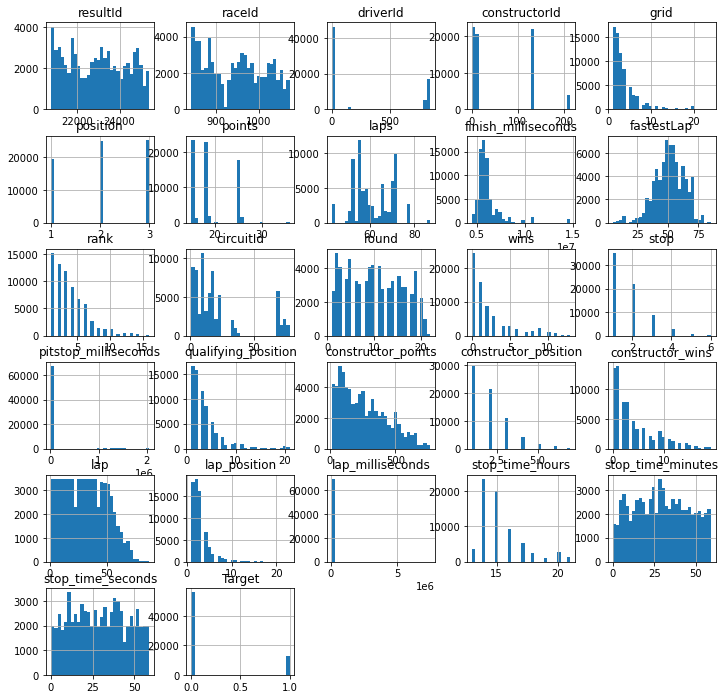

In [59]:
# Handle Outliers
# Visualize the numerical features
data.hist(bins=30, figsize=(12,12))
plt.show()

In [60]:
# define function
def diagnostic_plots(df, variable):
    # dataframe and a variable are used as arguments to generate the plots

    # Figure size
    plt.figure(figsize=(16, 4))
    plt.suptitle('{}'.format(variable), fontsize=16) #set variable as title

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Sample Quantiles')

    # Box-Plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

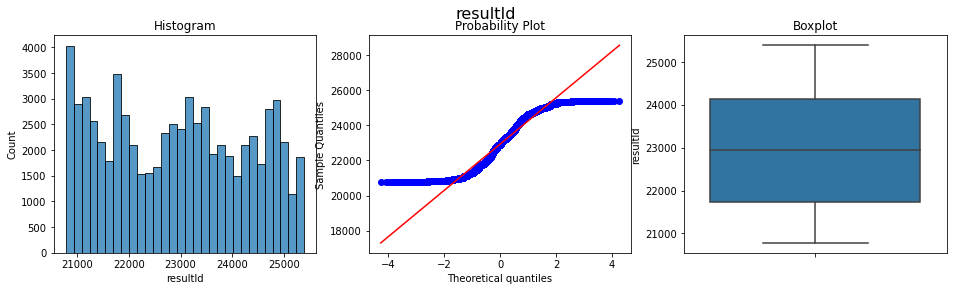

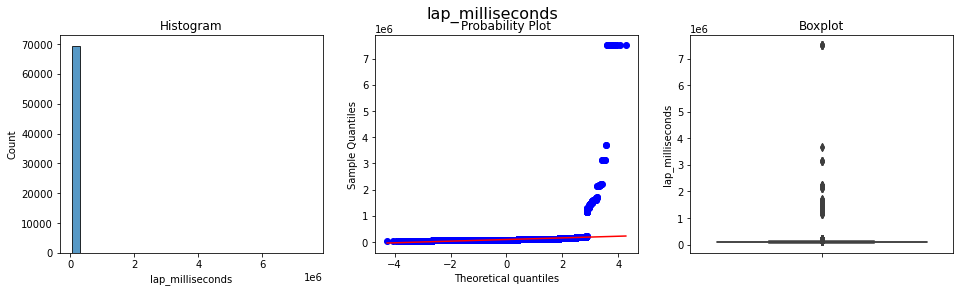

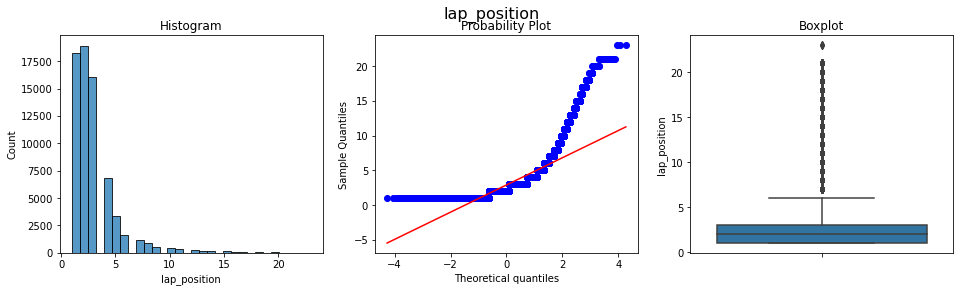

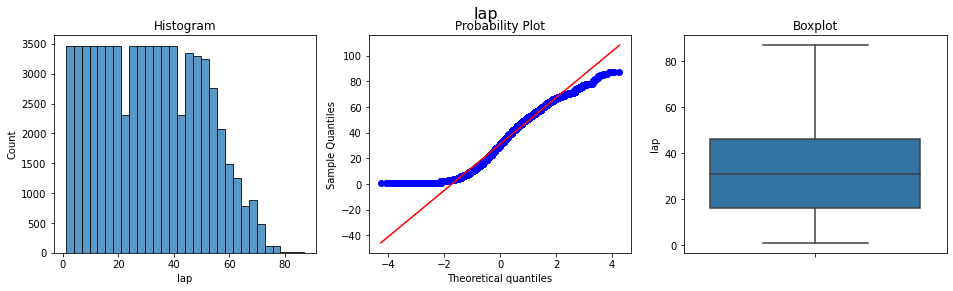

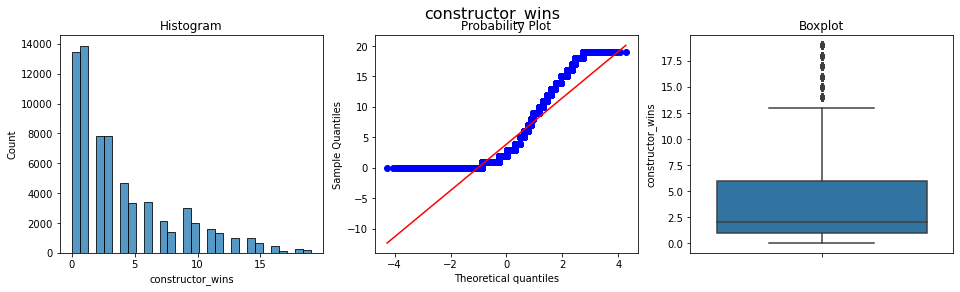

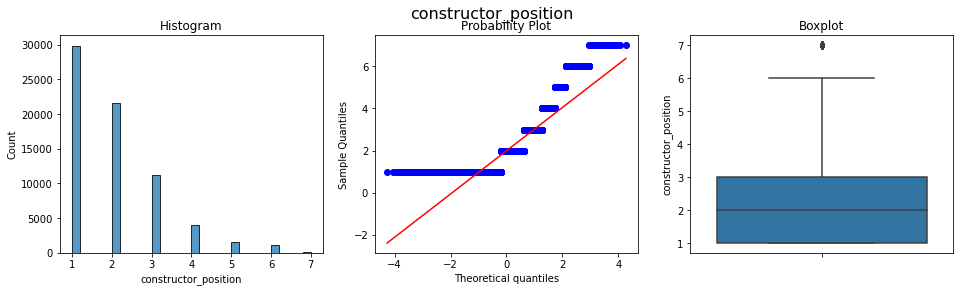

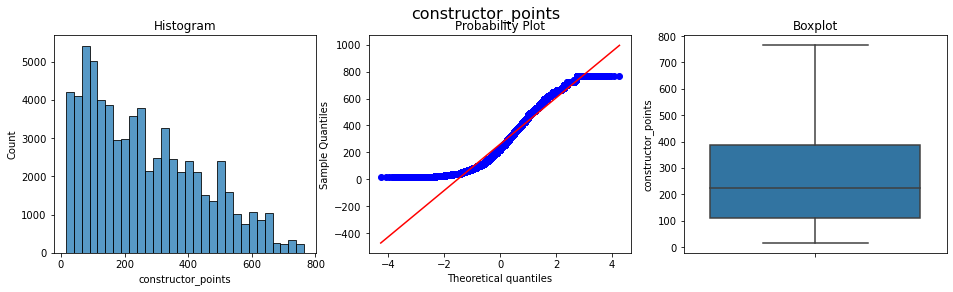

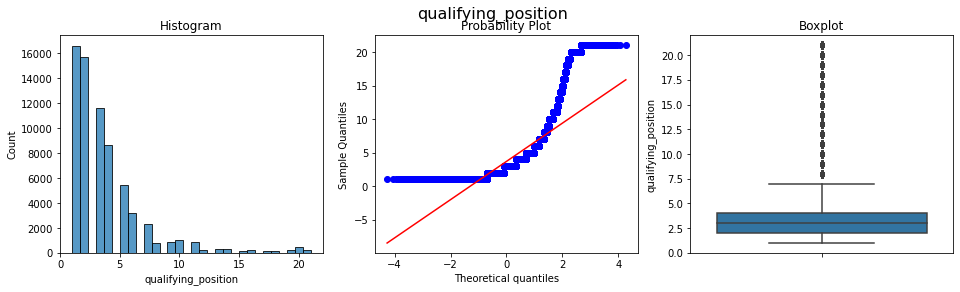

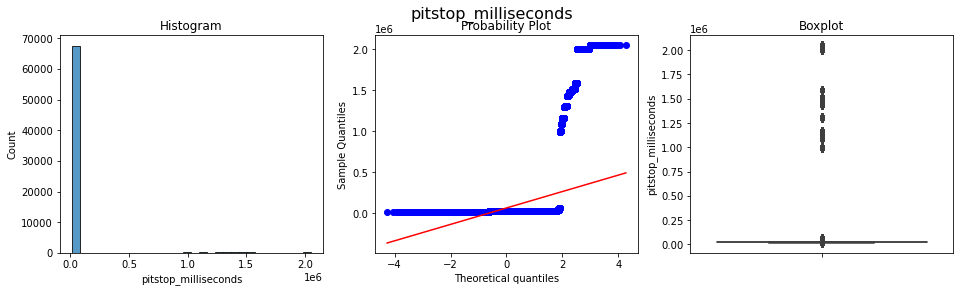

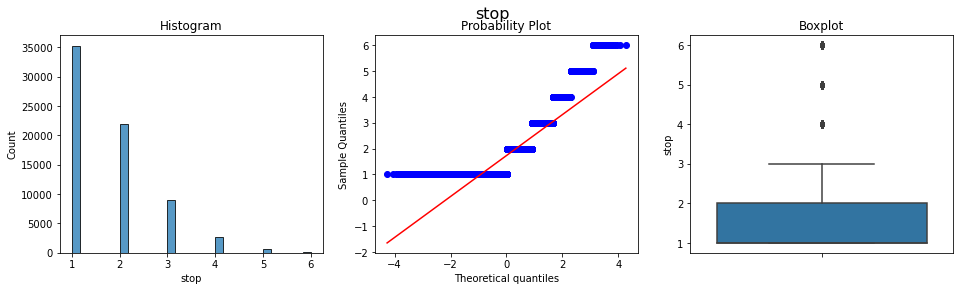

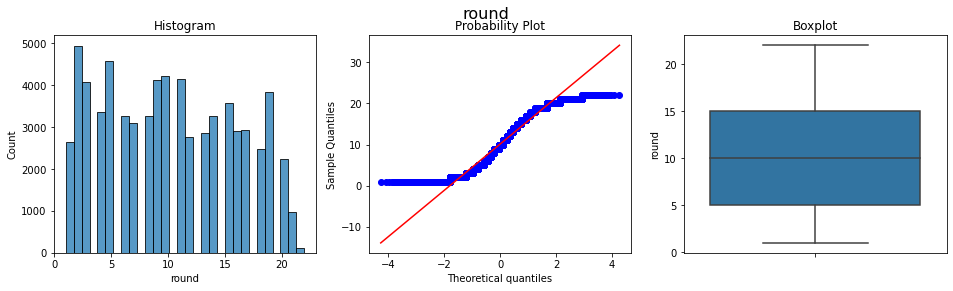

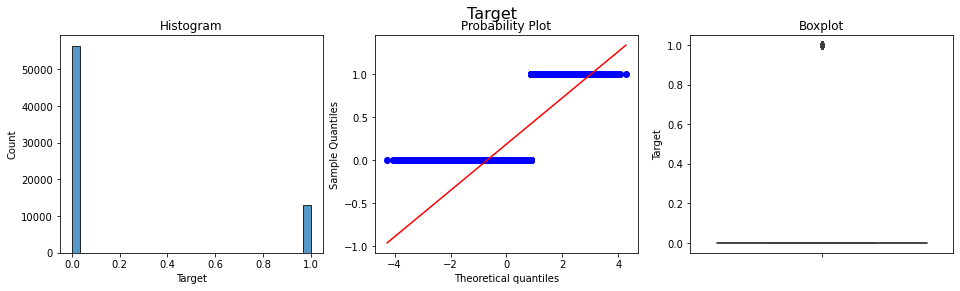

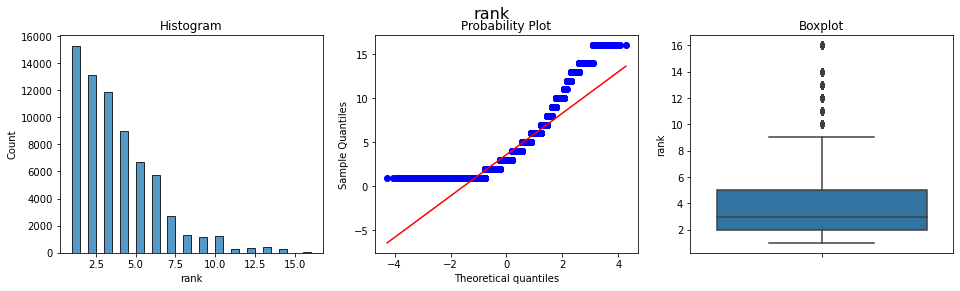

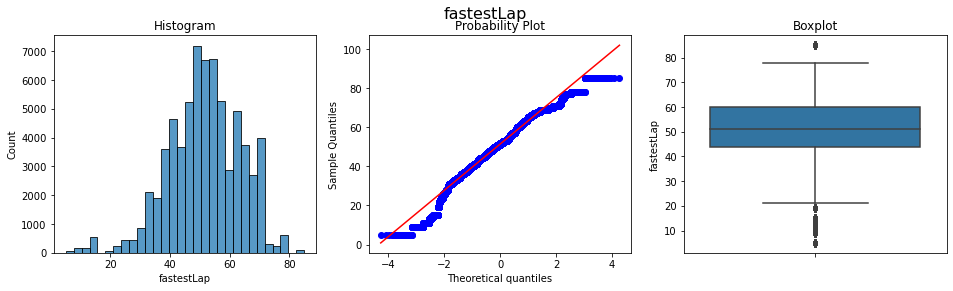

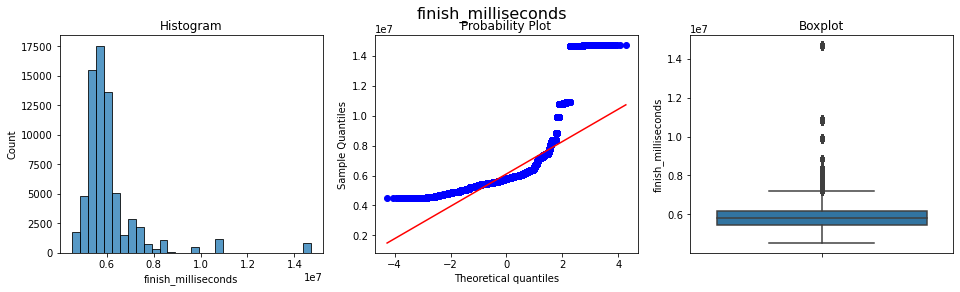

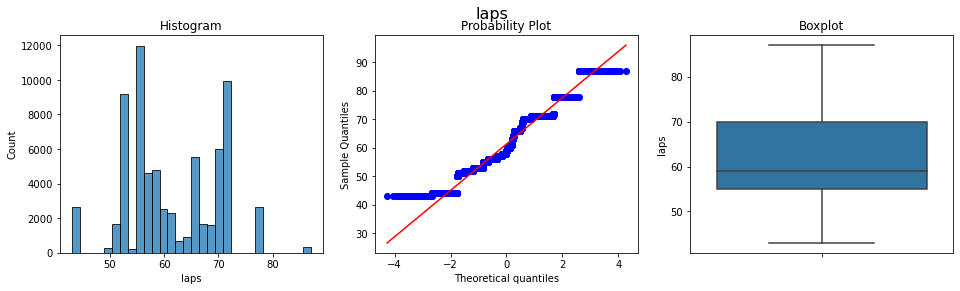

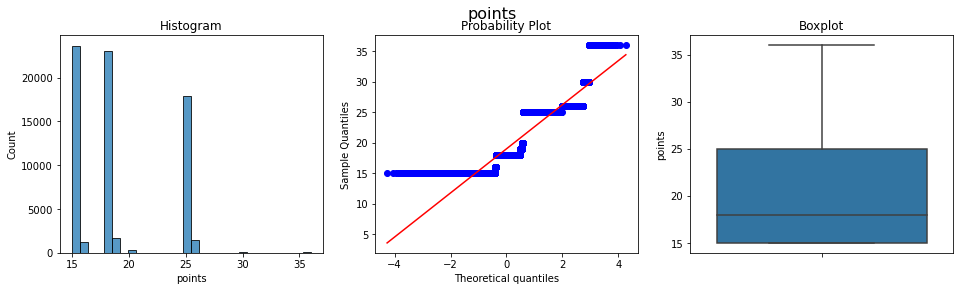

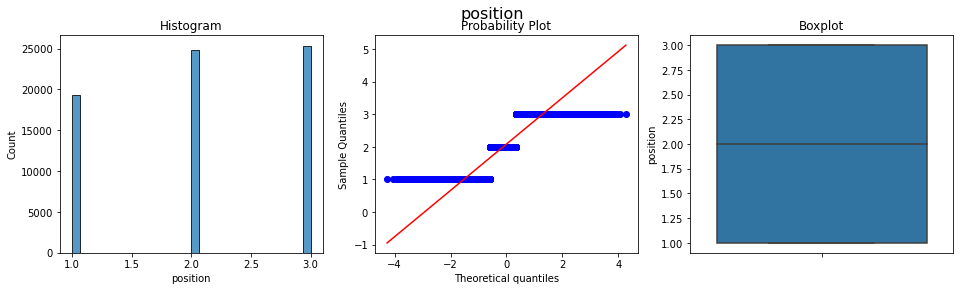

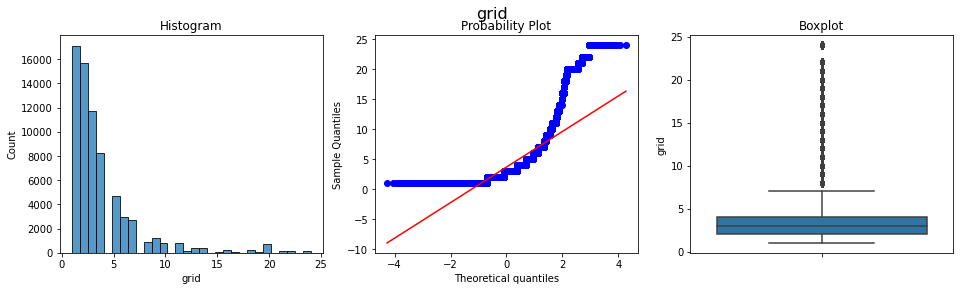

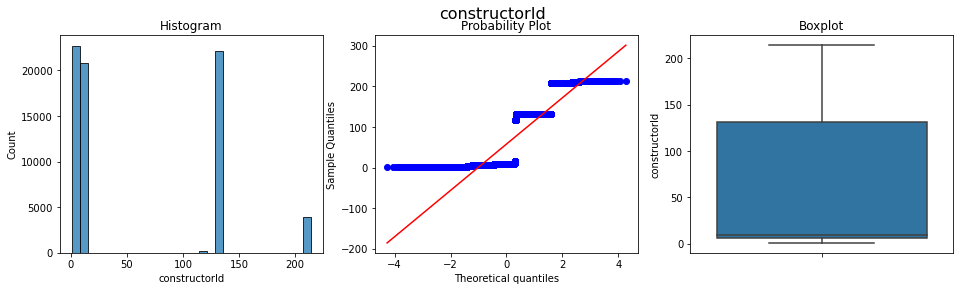

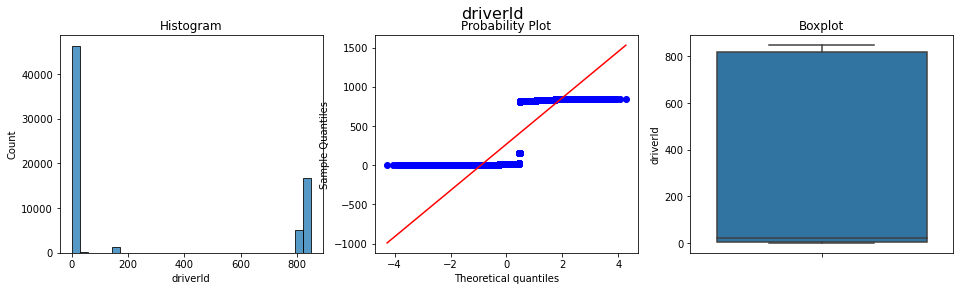

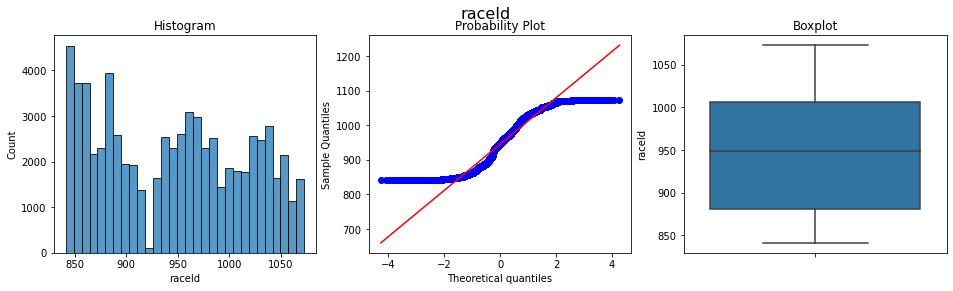

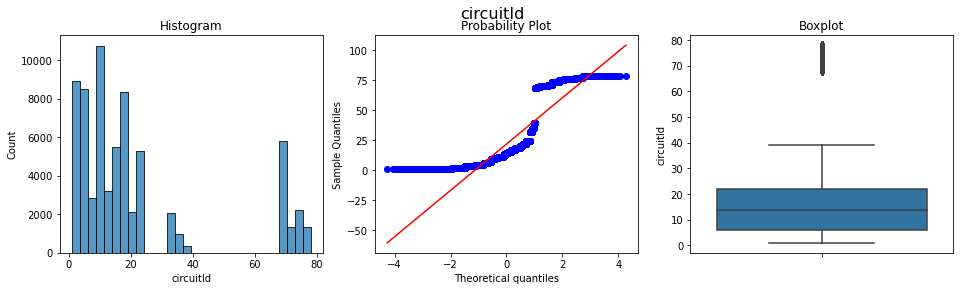

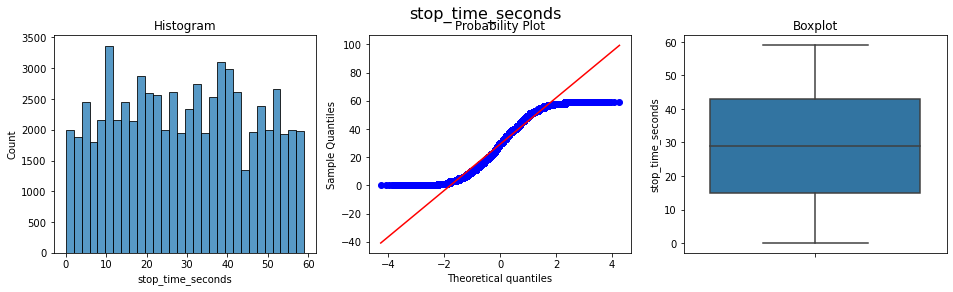

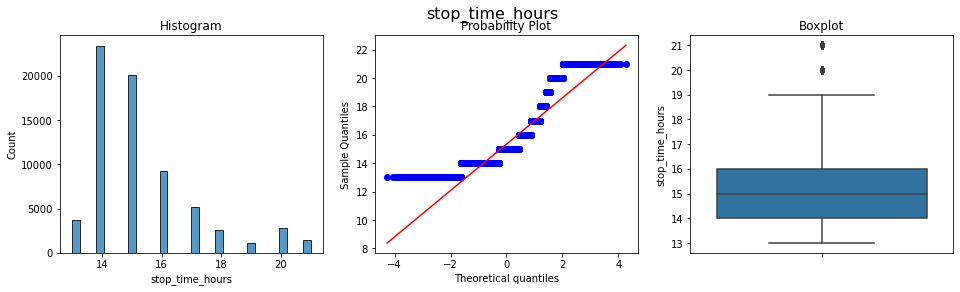

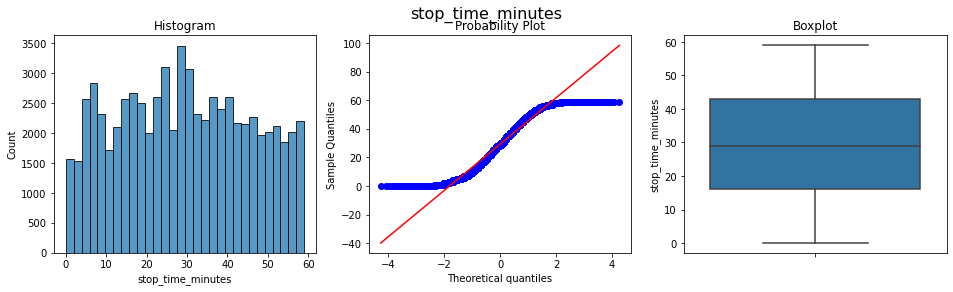

In [61]:
# Observe distribution of numerical values, detect outliers
diagnostic_plots(data, 'resultId')
diagnostic_plots(data, 'lap_milliseconds')
diagnostic_plots(data, 'lap_position')
diagnostic_plots(data, 'lap')
diagnostic_plots(data, 'constructor_wins')
diagnostic_plots(data, 'constructor_position')
diagnostic_plots(data, 'constructor_points')
diagnostic_plots(data, 'qualifying_position')
diagnostic_plots(data, 'pitstop_milliseconds')
diagnostic_plots(data, 'stop')
diagnostic_plots(data, 'round')
diagnostic_plots(data, 'Target')
diagnostic_plots(data, 'rank')
diagnostic_plots(data, 'fastestLap')
diagnostic_plots(data, 'finish_milliseconds')
diagnostic_plots(data, 'laps')
diagnostic_plots(data, 'points')
diagnostic_plots(data, 'position')
diagnostic_plots(data, 'grid')
diagnostic_plots(data, 'constructorId')
diagnostic_plots(data, 'driverId')
diagnostic_plots(data, 'raceId')
diagnostic_plots(data, 'circuitId')
diagnostic_plots(data, 'stop_time_seconds')
diagnostic_plots(data, 'stop_time_hours')
diagnostic_plots(data, 'stop_time_minutes')


In [62]:
# Perform Outlier Handling
# Outliers Found in: 'lap_milliseconds','lap_position','constructor_wins','constructor_points'
# ,'pitstop_milliseconds','stop','rank','finish_milliseconds','points','grid'
# ,'position','circuitId','stop_time_hours','fastestLap', 'qualifying_position'
# ,'Target'
windsorizer = Winsorizer(capping_method ='gaussian', 
                        tail='both', fold = 2, 
                         variables=['lap_milliseconds','lap_position','constructor_wins','constructor_points'
                                        ,'pitstop_milliseconds','stop','rank','finish_milliseconds','points','grid'
                                        ,'position','circuitId','stop_time_hours','fastestLap', 'qualifying_position'
                                        
                                   ])

windsorizer.fit(data)
data_t = windsorizer.transform(data)

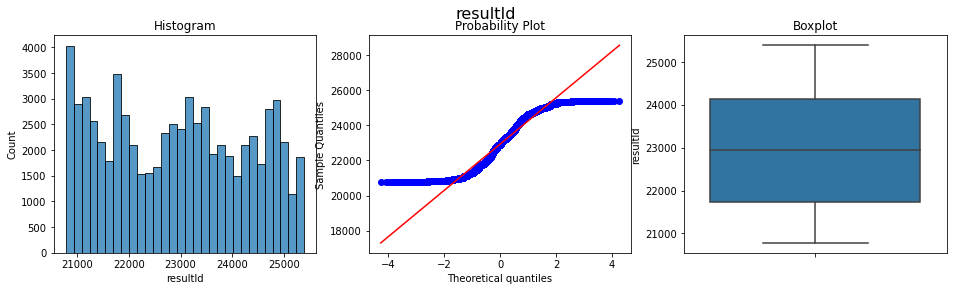

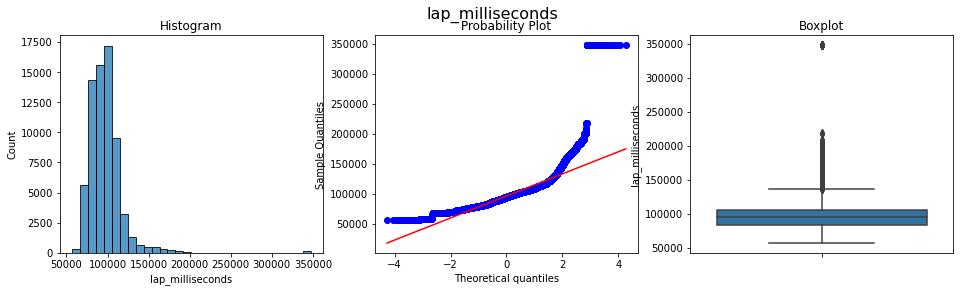

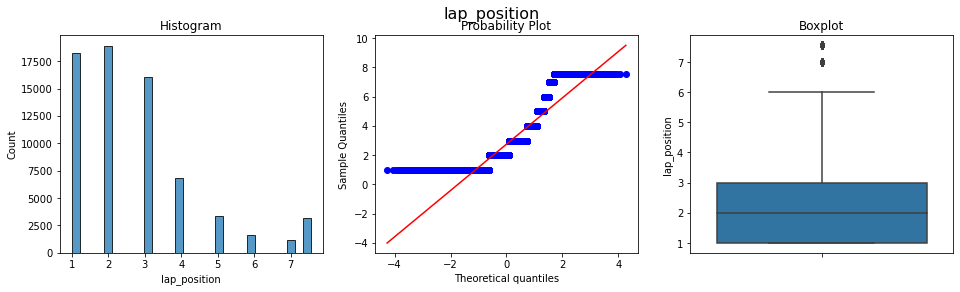

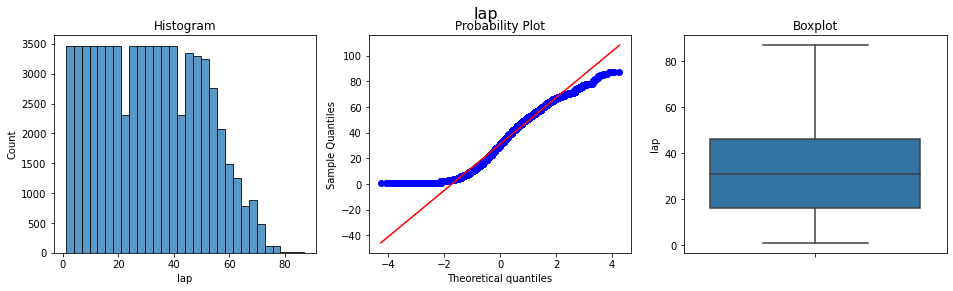

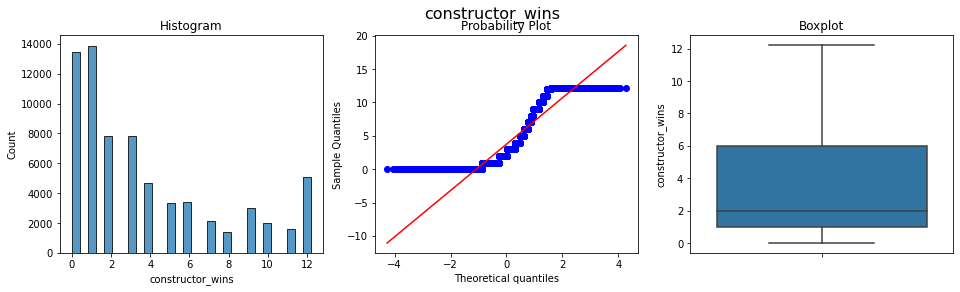

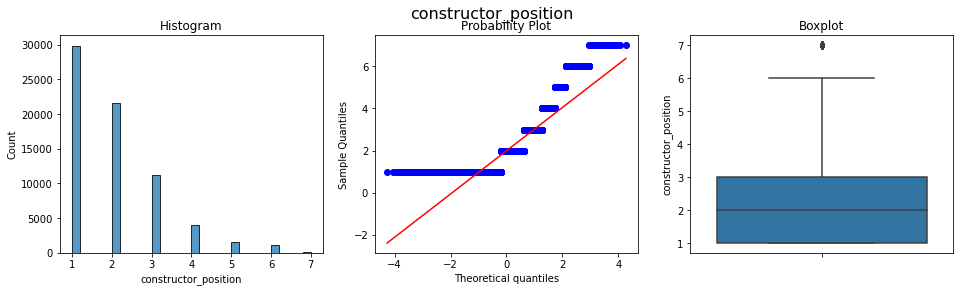

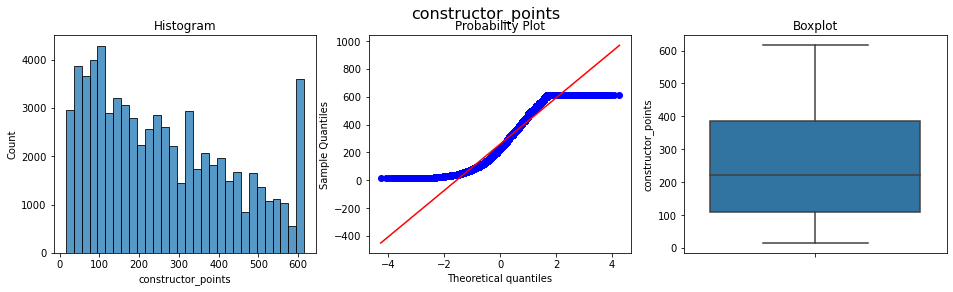

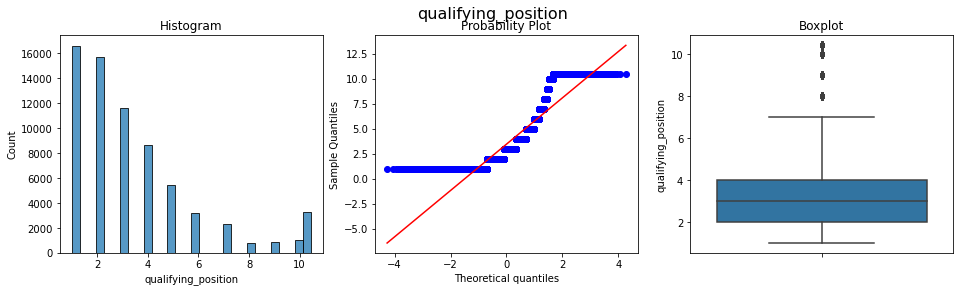

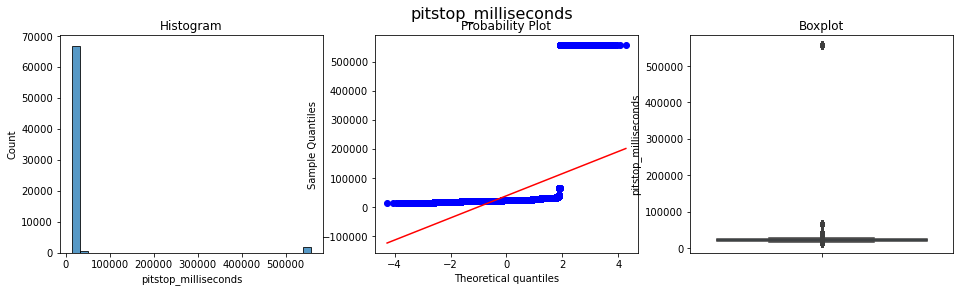

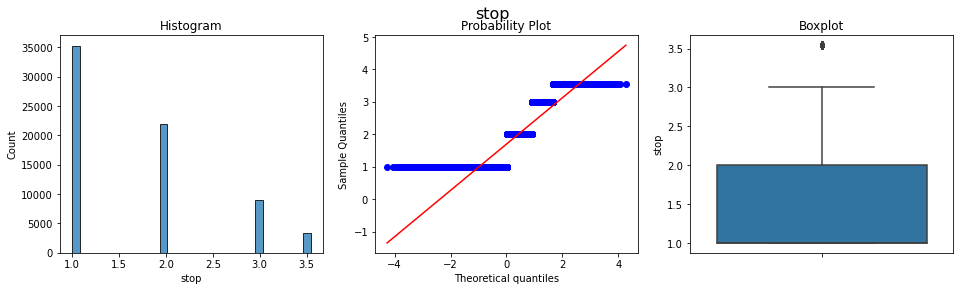

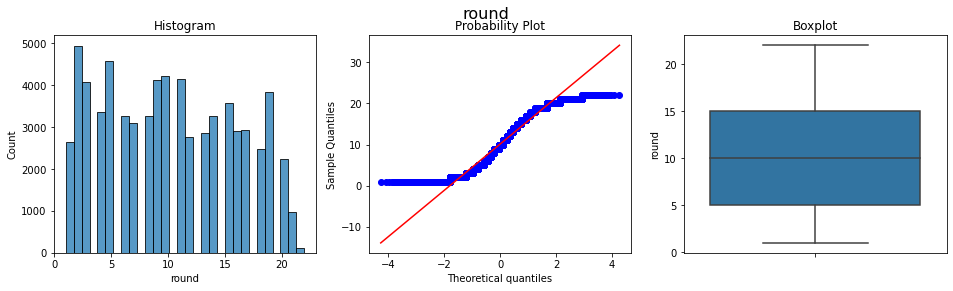

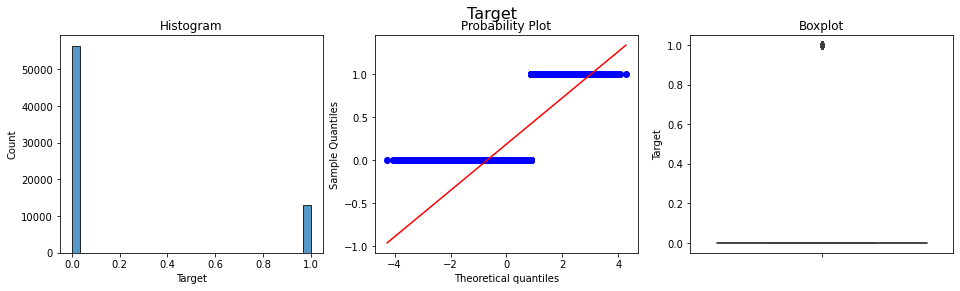

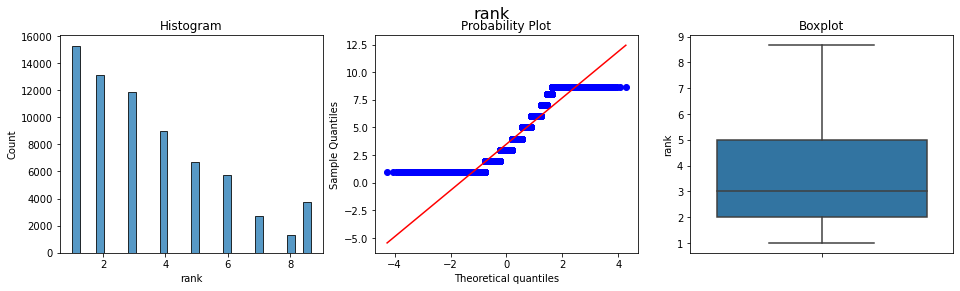

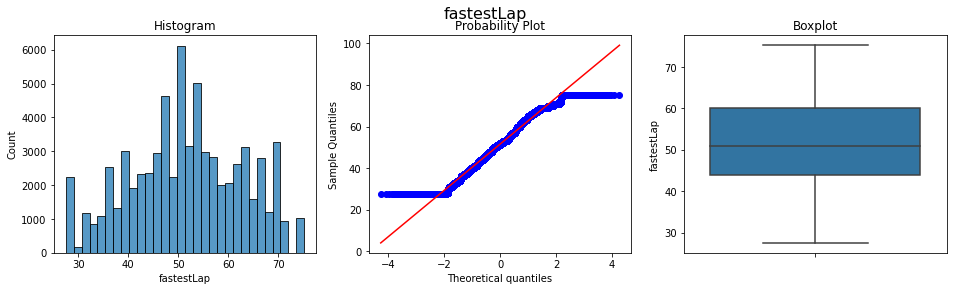

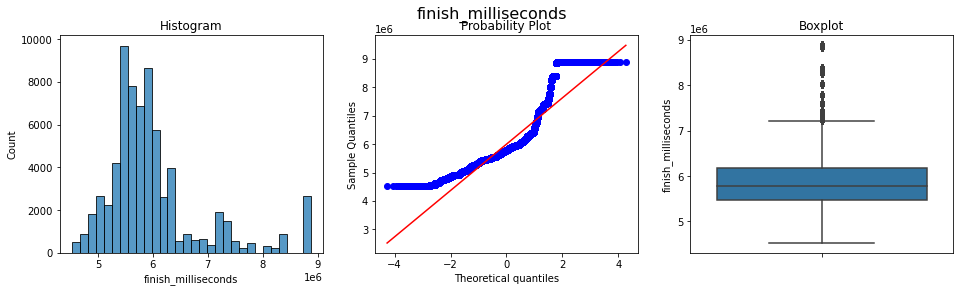

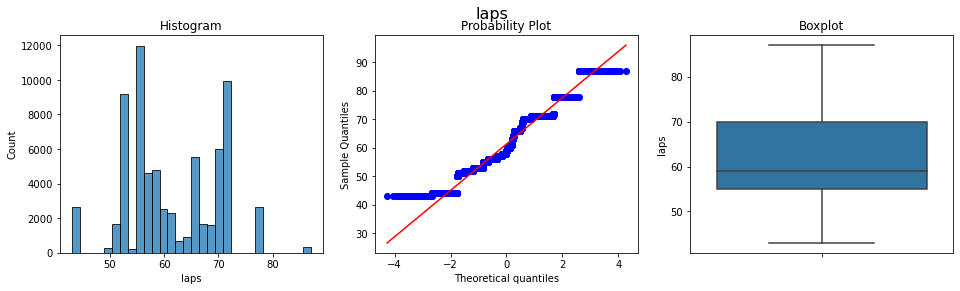

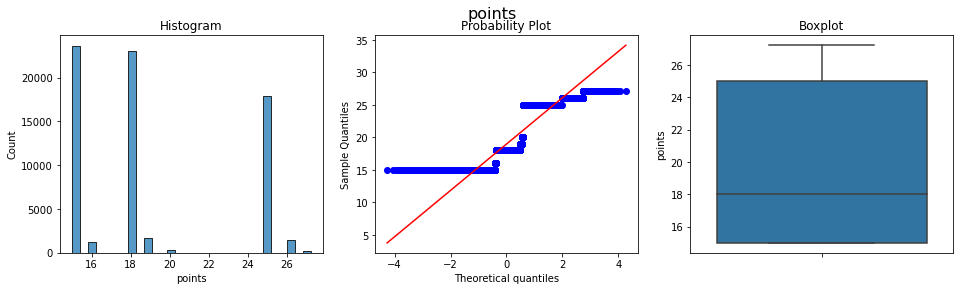

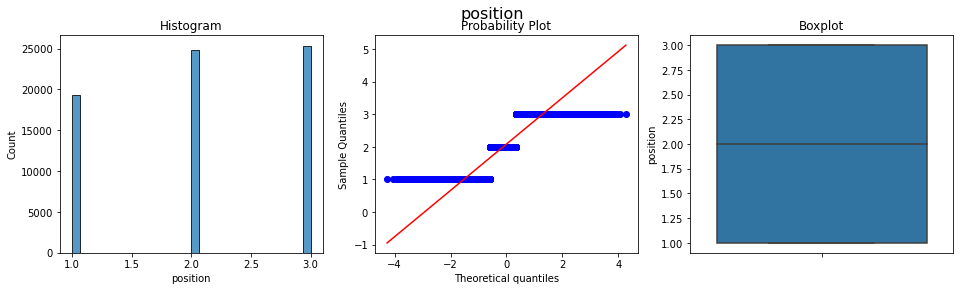

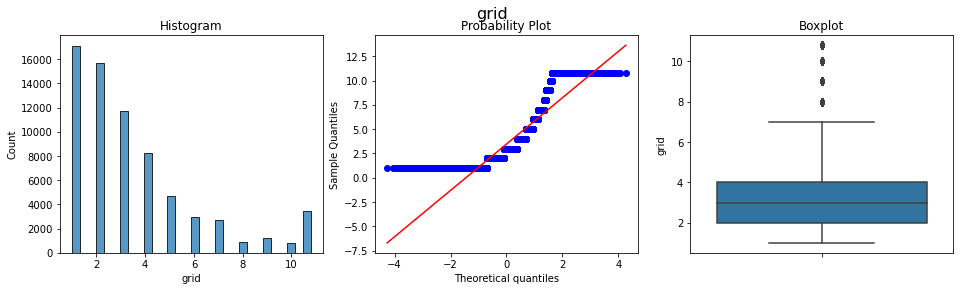

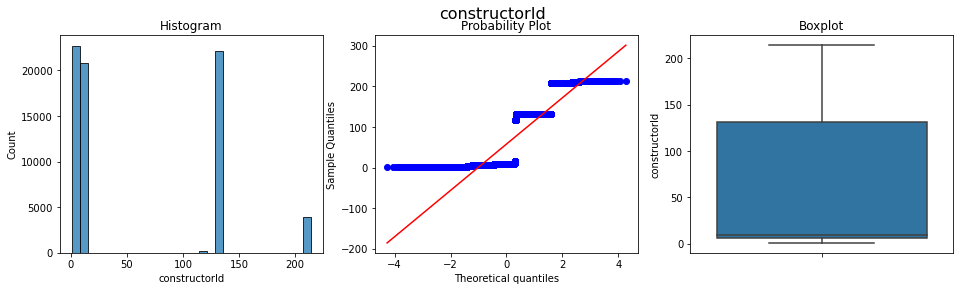

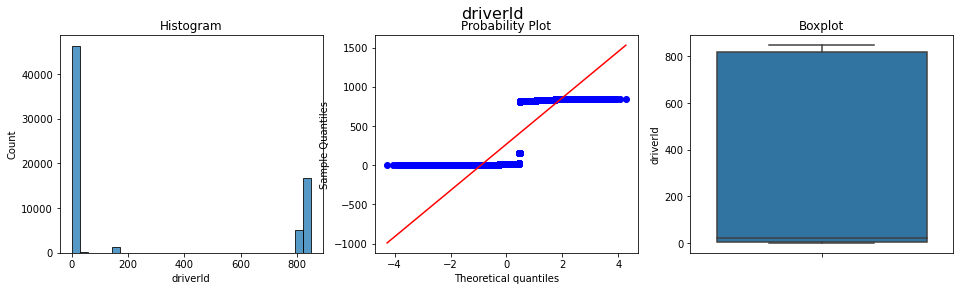

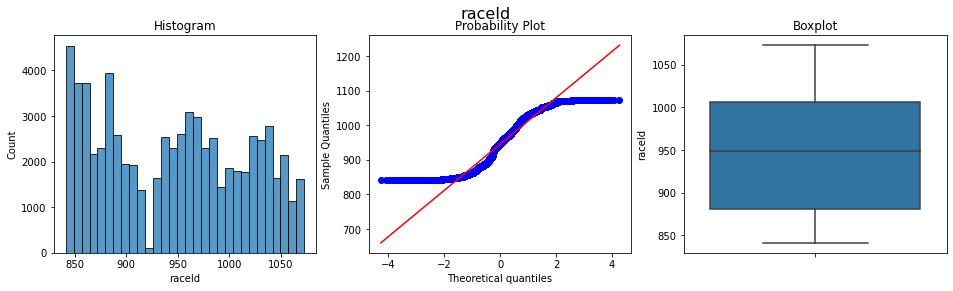

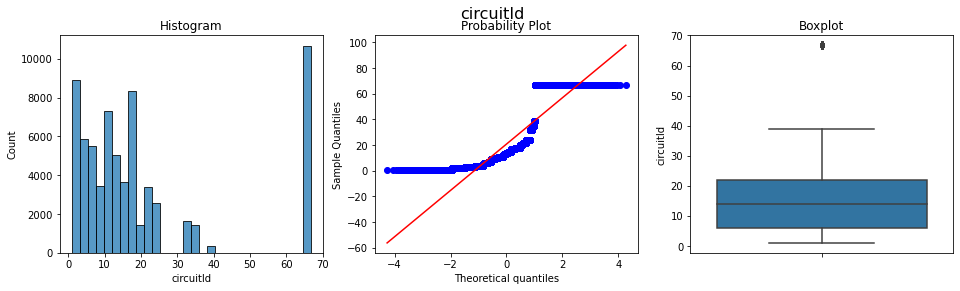

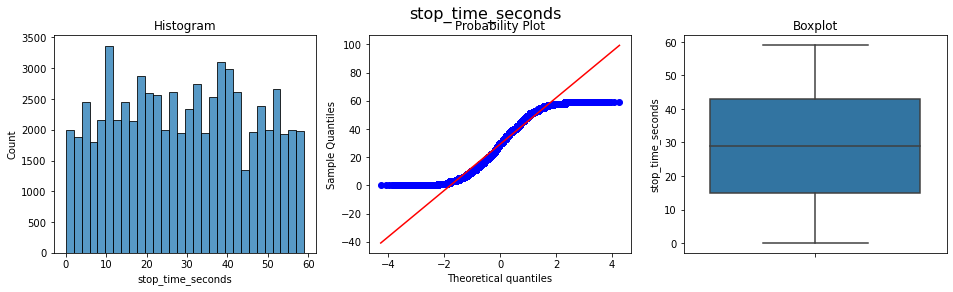

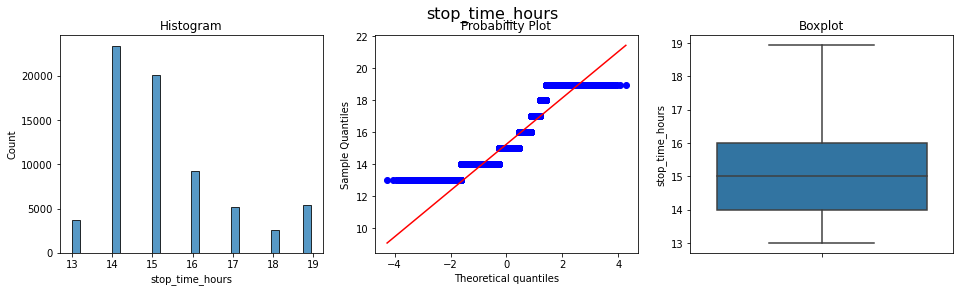

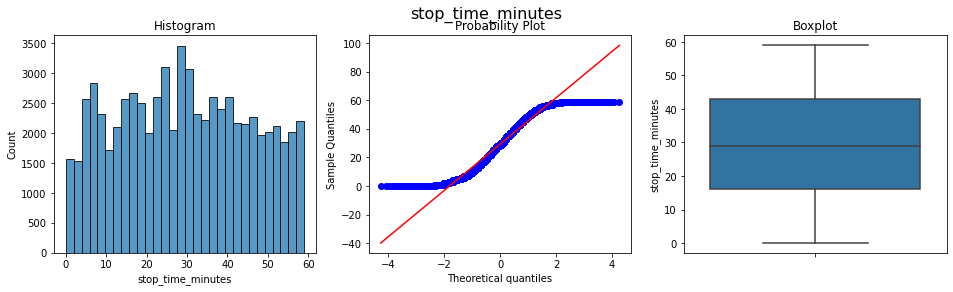

In [63]:
# Inspect new Distribution
diagnostic_plots(data_t, 'resultId')
diagnostic_plots(data_t, 'lap_milliseconds')
diagnostic_plots(data_t, 'lap_position')
diagnostic_plots(data_t, 'lap')
diagnostic_plots(data_t, 'constructor_wins')
diagnostic_plots(data_t, 'constructor_position')
diagnostic_plots(data_t, 'constructor_points')
diagnostic_plots(data_t, 'qualifying_position')
diagnostic_plots(data_t, 'pitstop_milliseconds')
diagnostic_plots(data_t, 'stop')
diagnostic_plots(data_t, 'round')
diagnostic_plots(data_t, 'Target')
diagnostic_plots(data_t, 'rank')
diagnostic_plots(data_t, 'fastestLap')
diagnostic_plots(data_t, 'finish_milliseconds')
diagnostic_plots(data_t, 'laps')
diagnostic_plots(data_t, 'points')
diagnostic_plots(data_t, 'position')
diagnostic_plots(data_t, 'grid')
diagnostic_plots(data_t, 'constructorId')
diagnostic_plots(data_t, 'driverId')
diagnostic_plots(data_t, 'raceId')
diagnostic_plots(data_t, 'circuitId')
diagnostic_plots(data_t, 'stop_time_seconds')
diagnostic_plots(data_t, 'stop_time_hours')
diagnostic_plots(data_t, 'stop_time_minutes')

In [64]:
# Numerical Transformation (Power Transformer)
data_t = data
p = PowerTransformer(variables= [
'resultId','lap_milliseconds','lap_position','lap','constructor_wins','constructor_position',
'constructor_points','qualifying_position','pitstop_milliseconds','stop','round','rank',
'finish_milliseconds','laps','points','position','grid','constructorId','driverId','raceId','circuitId','stop_time_seconds',
'stop_time_hours','stop_time_minutes', 'Target','fastestLap'
], exp=1/3)

# fit transformer to data set
p.fit(data_t)
data_tf = p.transform(data_t)

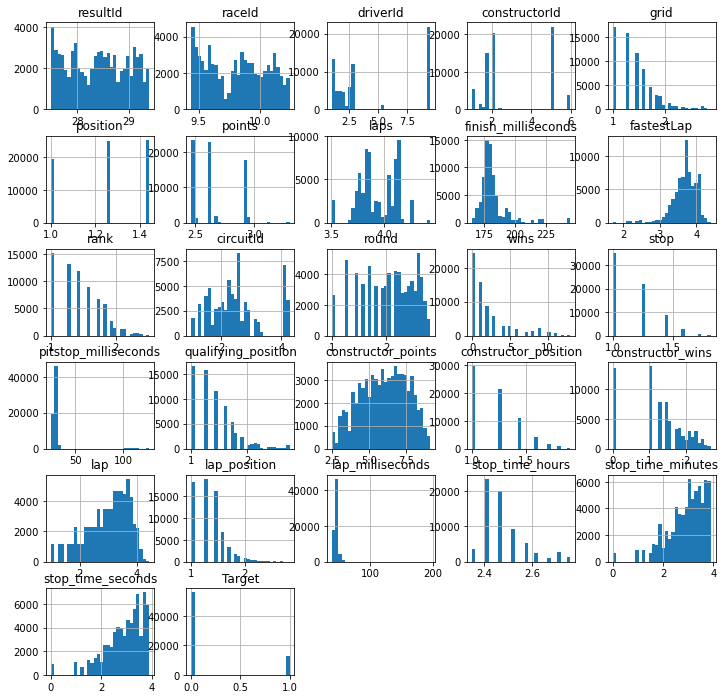

In [65]:
# Inspect Changes
data_tf.hist(bins=30, figsize=(12,12))
plt.show()

In [66]:
# Inspect Correlation of features
data_tf.corr()

,resultId,raceId,driverId,constructorId,grid,position,points,laps,finish_milliseconds,fastestLap,...,constructor_points,constructor_position,constructor_wins,lap,lap_position,lap_milliseconds,stop_time_hours,stop_time_minutes,stop_time_seconds,Target
resultId,1.000000,0.999194,0.480025,0.277490,-0.044638,0.058889,-0.032649,0.064458,-0.102298,0.009201,...,0.124275,-0.046258,0.051599,0.011348,-0.002493,-0.100691,0.078736,0.079077,0.048723,0.116772
raceId,0.999194,1.000000,0.480919,0.272081,-0.048968,0.057037,-0.031618,0.067208,-0.098017,0.011679,...,0.123492,-0.049946,0.051476,0.011824,-0.003922,-0.100795,0.076854,0.081410,0.048943,0.118785
driverId,0.480025,0.480919,1.000000,-0.141598,0.166279,0.268033,-0.245270,0.092836,0.026562,0.099379,...,-0.149921,0.333898,-0.298429,0.016324,0.184486,-0.051839,0.079450,0.039491,0.017252,-0.452307
constructorId,0.277490,0.272081,-0.141598,1.000000,-0.173668,-0.099795,0.096215,-0.056639,-0.084691,-0.075127,...,0.148070,-0.300036,0.307616,-0.009981,-0.104526,-0.007408,0.016164,0.024857,0.025961,0.411336
grid,-0.044638,-0.048968,0.166279,-0.173668,1.000000,0.381696,-0.383156,-0.022529,0.100490,-0.000678,...,-0.230994,0.452659,-0.392763,-0.003903,0.555546,0.054199,0.019843,-0.019407,0.012423,-0.223250
position,0.058889,0.057037,0.268033,-0.099795,0.381696,1.000000,-0.972422,0.003312,-0.003392,-0.005373,...,-0.144962,0.285477,-0.342379,0.000670,0.525787,0.003962,0.004306,-0.003693,0.031928,-0.257490
points,-0.032649,-0.031618,-0.245270,0.096215,-0.383156,-0.972422,1.000000,-0.003851,0.000416,0.016547,...,0.153327,-0.278008,0.327578,-0.000774,-0.516762,-0.005862,0.008826,-0.000983,-0.030891,0.263102
laps,0.064458,0.067208,0.092836,-0.056639,-0.022529,0.003312,-0.003851,1.000000,0.168820,0.517239,...,-0.007580,0.061629,-0.050126,0.176849,0.005195,-0.351350,-0.157983,0.018084,0.026405,-0.010767
finish_milliseconds,-0.102298,-0.098017,0.026562,-0.084691,0.100490,-0.003392,0.000416,0.168820,1.000000,0.104943,...,-0.000175,0.038327,-0.000199,0.029806,0.127346,0.229012,0.244057,-0.019521,-0.025406,-0.041463
fastestLap,0.009201,0.011679,0.099379,-0.075127,-0.000678,-0.005373,0.016547,0.517239,0.104943,1.000000,...,-0.004662,0.029979,-0.040191,0.091422,0.041471,-0.194781,-0.075361,0.000257,0.014375,-0.009722


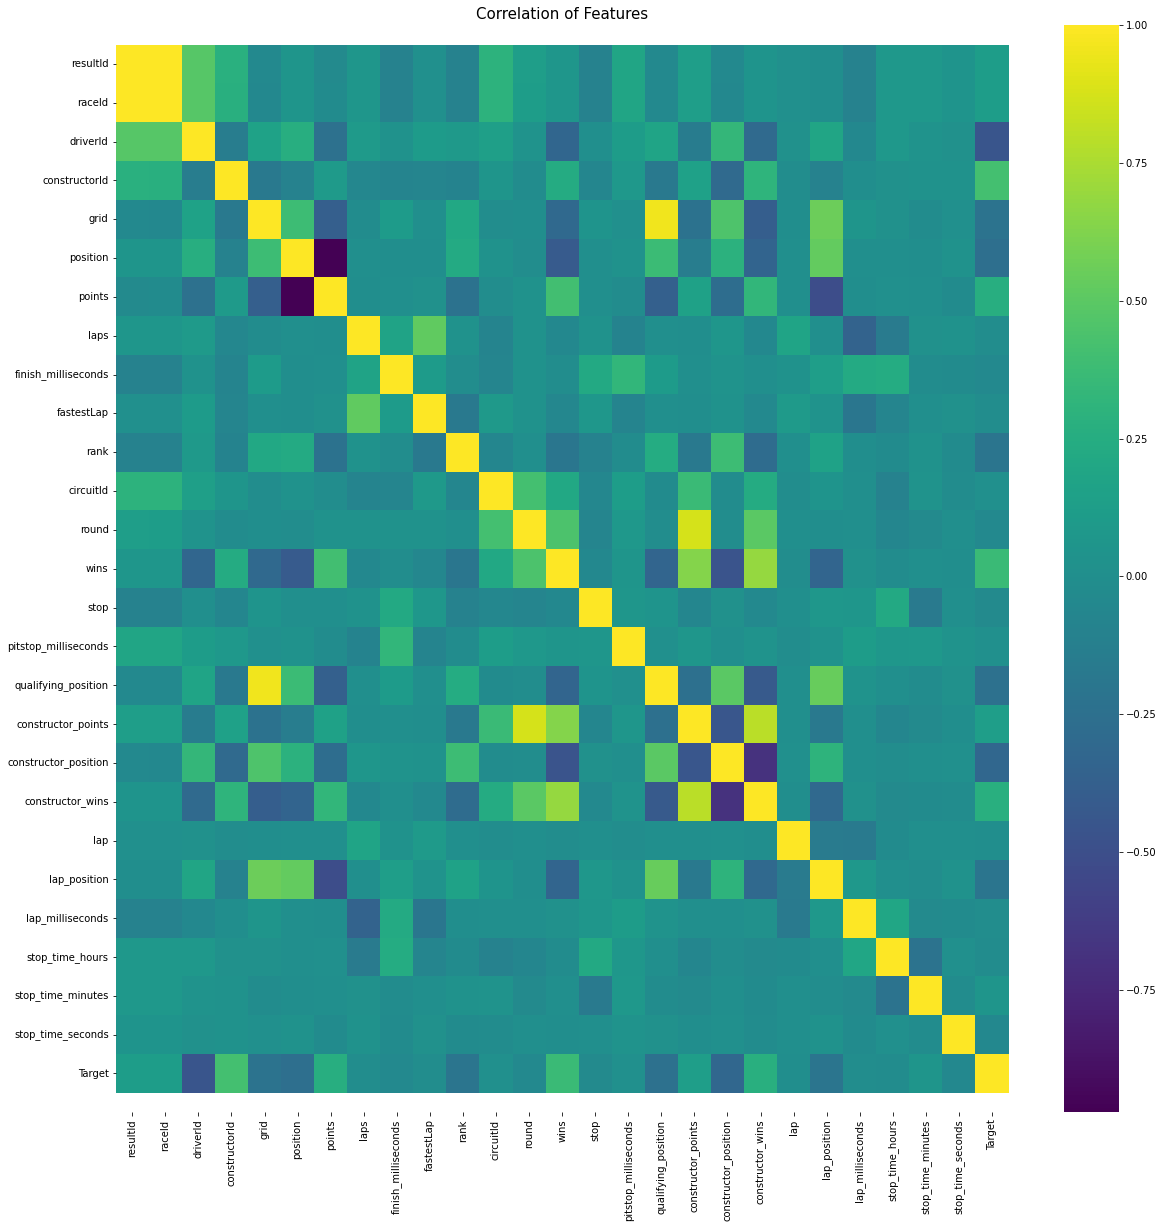

In [67]:
# Build a heatmap to visualize correlation
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Correlation of Features', size=15)
ax = sns.heatmap(data_tf.corr(), cmap=colormap, annot=False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [68]:
# Identify and drop Data Leak column
# tested on 'points','wins', 'constructor_wins', 'constructor_points','constructor_position',
#'position', qualifying_position'
# data_tf = data_tf.drop(['points','wins', 'constructor_wins', 'constructor_points','constructor_position', 'position'], axis = 1)

In [69]:
# Train Test Split
# Split the dataset into training (70%) and testing (30%)
# 'Target' column as target variable
X_train, X_test, y_train, y_test = train_test_split(
    data_tf.drop(labels=['Target'], axis=1),  # predictors
    data_tf['Target'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=71)  # seed ensures reproducibility

X_train.shape, X_test.shape

((48692, 37), (20869, 37))

In [70]:
# Find Missing Values
data_tf.isnull().sum()

resultId                   0
raceId                     0
driverId                   0
constructorId              0
number                     0
grid                       0
position                   0
points                     0
laps                       0
finish_milliseconds        0
fastestLap                 0
rank                       0
fastestLapSpeed            0
circuitId                  0
round                      0
race_name                  0
driver_points              0
wins                       0
constructor_name           0
constructor_nationality    0
stop                       0
pitstop_milliseconds       0
circuit_name               0
location                   0
country                    0
qualifying_position        0
driver_nationality         0
driver_name                0
constructor_points         0
constructor_position       0
constructor_wins           0
lap                        0
lap_position               0
lap_milliseconds           0
stop_time_hour

In [71]:
# One-Hot-Encoding Top Categories (10)
# create the encoder
ohe_enc = OneHotEncoder(top_categories=10, # limit to 10 to prevent fragmentation
    drop_last=False)  # false to return k (better to not drop [False])

In [72]:
# transform
ohe_enc.fit(X_train)

OneHotEncoder(top_categories=10)

In [73]:
# inspect the variables that will be encoded
ohe_enc.variables

In [74]:
# Transform the training and testing sets
X_train_enc = ohe_enc.transform(X_train)
X_test_enc = ohe_enc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X[str(feature) + "_" + str(category)] = np.where(


In [75]:
# Inspect the datasets
# train
X_train_enc.head()

,resultId,raceId,driverId,constructorId,grid,position,points,laps,finish_milliseconds,fastestLap,...,driver_name_Lewis Hamilton,driver_name_Sebastian Vettel,driver_name_Valtteri Bottas,driver_name_Max Verstappen,driver_name_Nico Rosberg,driver_name_Fernando Alonso,driver_name_Kimi Räikkönen,driver_name_Daniel Ricciardo,driver_name_Mark Webber,driver_name_Jenson Button
144670,27.897585,9.582840,2.000000,5.924992,1.912931,1.000000,2.924018,3.870877,175.475983,3.825862,...,0,0,0,0,0,0,1,0,0,0
209122,28.576893,9.888767,9.397796,2.080084,1.587401,1.442250,2.466212,4.140818,221.605446,4.061548,...,0,0,0,1,0,0,0,0,0,0
167967,27.492119,9.439131,2.714418,2.080084,1.000000,1.000000,2.924018,3.870877,175.118385,3.530348,...,0,1,0,0,0,0,0,0,0,0
162196,27.722167,9.520730,2.000000,5.924992,2.223980,1.259921,2.620741,3.848501,178.781096,3.448217,...,0,0,0,0,0,0,1,0,0,0
57523,29.196056,10.144567,9.340839,5.953342,1.442250,1.259921,2.620741,3.870877,183.421644,3.684031,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# test
X_test_enc.head()

,resultId,raceId,driverId,constructorId,grid,position,points,laps,finish_milliseconds,fastestLap,...,driver_name_Lewis Hamilton,driver_name_Sebastian Vettel,driver_name_Valtteri Bottas,driver_name_Max Verstappen,driver_name_Nico Rosberg,driver_name_Fernando Alonso,driver_name_Kimi Räikkönen,driver_name_Daniel Ricciardo,driver_name_Mark Webber,driver_name_Jenson Button
6732,27.533953,9.454072,1.000000,1.000000,1.442250,1.259921,2.620741,4.041240,181.144264,3.732511,...,1,0,0,0,0,0,0,0,0,0
13542,28.313234,9.774974,1.442250,5.078753,1.259921,1.259921,2.620741,3.732511,176.503348,2.884499,...,0,0,0,0,1,0,0,0,0,0
152241,27.973189,9.611791,2.000000,5.924992,1.587401,1.259921,2.620741,3.914868,182.473258,3.848501,...,0,0,0,0,0,0,1,0,0,0
203065,28.321964,9.781946,9.348473,2.080084,1.587401,1.442250,2.466212,4.101566,185.615858,4.081655,...,0,0,0,0,0,0,0,1,0,0
1162,28.757792,9.963198,1.000000,5.078753,1.000000,1.259921,2.620741,3.870877,175.205951,3.684031,...,1,0,0,0,0,0,0,0,0,0


In [77]:
# Using Equal Width Discretiser (Feature Engine)
disc = EqualWidthDiscretiser(bins=20, variables = ['resultId','lap_milliseconds','lap_position','lap','qualifying_position','pitstop_milliseconds','stop','round','rank',
                                                    'finish_milliseconds','laps','grid','constructorId','driverId','raceId','circuitId','stop_time_seconds',
                                                    'stop_time_hours','stop_time_minutes','fastestLap'], return_object=True) # return as object (categorical)

disc.fit(X_train_enc)

EqualWidthDiscretiser(bins=20, return_object=True,
                      variables=['resultId', 'lap_milliseconds', 'lap_position',
                                 'lap', 'qualifying_position',
                                 'pitstop_milliseconds', 'stop', 'round',
                                 'rank', 'finish_milliseconds', 'laps', 'grid',
                                 'constructorId', 'driverId', 'raceId',
                                 'circuitId', 'stop_time_seconds',
                                 'stop_time_hours', 'stop_time_minutes',
                                 'fastestLap'])

In [78]:
disc.binner_dict_

{'resultId': [-inf,
  27.587046540019557,
  27.681974126279965,
  27.77690171254037,
  27.871829298800773,
  27.96675688506118,
  28.061684471321584,
  28.156612057581988,
  28.251539643842392,
  28.3464672301028,
  28.441394816363204,
  28.536322402623608,
  28.631249988884015,
  28.72617757514442,
  28.821105161404823,
  28.916032747665227,
  29.010960333925635,
  29.10588792018604,
  29.200815506446443,
  29.29574309270685,
  inf],
 'lap_milliseconds': [-inf,
  46.30500161535467,
  54.17253798738915,
  62.040074359423635,
  69.90761073145812,
  77.7751471034926,
  85.6426834755271,
  93.51021984756157,
  101.37775621959605,
  109.24529259163054,
  117.11282896366504,
  124.9803653356995,
  132.847901707734,
  140.7154380797685,
  148.58297445180295,
  156.45051082383745,
  164.31804719587194,
  172.18558356790643,
  180.0531199399409,
  187.9206563119754,
  inf],
 'lap_position': [-inf,
  1.0921933489925784,
  1.1843866979851565,
  1.2765800469777349,
  1.368773395970313,
  1.460966

In [97]:
# Transform
X_train_v = disc.transform(X_train_enc)
X_test_v = disc.transform(X_test_enc)

In [99]:
#StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train_v)

# transform train and test sets
X_train_final = scaler.transform(X_train_v)
X_test_final = scaler.transform(X_test_v)
X_train_final.shape, X_test_final.shape

((48692, 133), (20869, 133))

In [100]:
# Convert back to dataframe
X_train_final = pd.DataFrame(X_train_final, columns=X_train_v.columns)
X_test_final = pd.DataFrame(X_test_final, columns=X_test_v.columns)


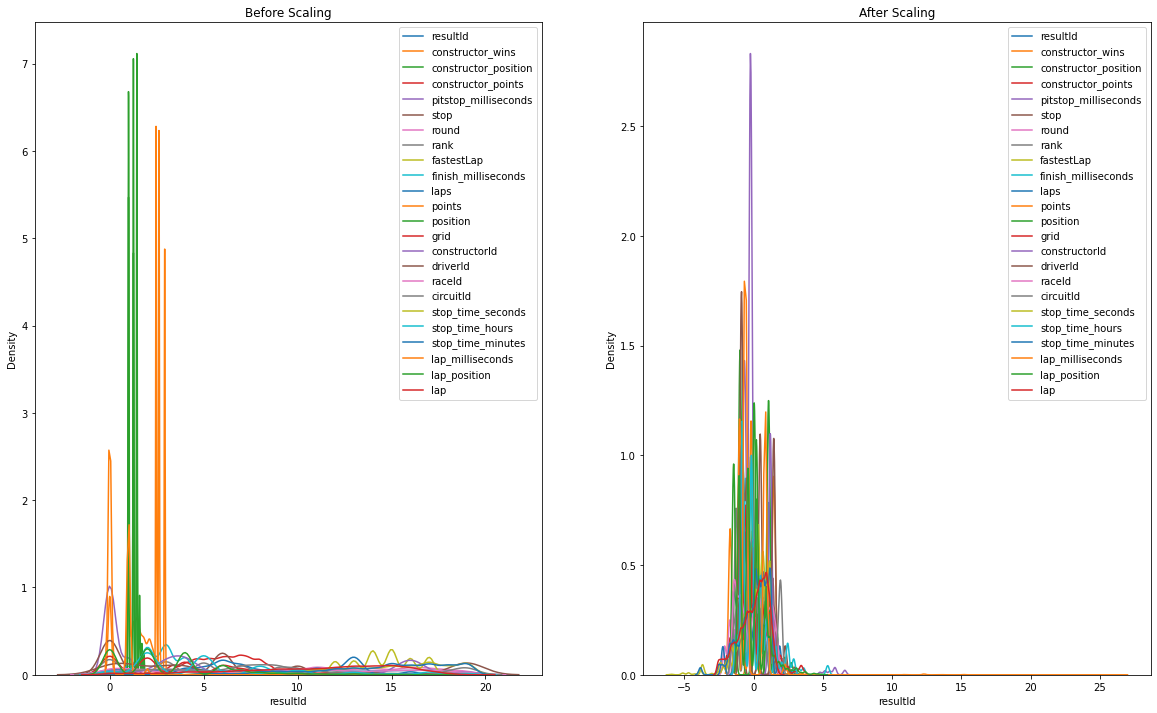

In [101]:
# Visualise before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 12))

# before
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_v['resultId'], ax=ax1, label ='resultId')
sns.kdeplot(X_train_v['constructor_wins'], ax=ax1, label ='constructor_wins')
sns.kdeplot(X_train_v['constructor_position'], ax=ax1, label ='constructor_position')
sns.kdeplot(X_train_v['constructor_points'], ax=ax1, label ='constructor_points')
sns.kdeplot(X_train_v['pitstop_milliseconds'], ax=ax1, label ='pitstop_milliseconds')
sns.kdeplot(X_train_v['stop'], ax=ax1, label ='stop')
sns.kdeplot(X_train_v['round'], ax=ax1, label ='round')
sns.kdeplot(X_train_v['rank'], ax=ax1, label ='rank')
sns.kdeplot(X_train_v['fastestLap'], ax=ax1, label ='fastestLap')
sns.kdeplot(X_train_v['finish_milliseconds'], ax=ax1, label ='finish_milliseconds')
sns.kdeplot(X_train_v['laps'], ax=ax1, label ='laps')
sns.kdeplot(X_train_v['points'], ax=ax1, label ='points')
sns.kdeplot(X_train_v['position'], ax=ax1, label ='position')
sns.kdeplot(X_train_v['grid'], ax=ax1, label ='grid')
sns.kdeplot(X_train_v['constructorId'], ax=ax1, label ='constructorId')
sns.kdeplot(X_train_v['driverId'], ax=ax1, label ='driverId')
sns.kdeplot(X_train_v['raceId'], ax=ax1, label ='raceId')
sns.kdeplot(X_train_v['circuitId'], ax=ax1, label ='circuitId')
sns.kdeplot(X_train_v['stop_time_seconds'], ax=ax1, label ='stop_time_seconds')
sns.kdeplot(X_train_v['stop_time_hours'], ax=ax1, label ='stop_time_hours')
sns.kdeplot(X_train_v['stop_time_minutes'], ax=ax1, label ='stop_time_minutes')
sns.kdeplot(X_train_v['lap_milliseconds'], ax=ax1, label ='lap_milliseconds')
sns.kdeplot(X_train_v['lap_position'], ax=ax1, label ='lap_position')
sns.kdeplot(X_train_v['lap'], ax=ax1, label ='lap')

ax1.legend()

# after
ax2.set_title('After Scaling')
sns.kdeplot(X_train_final['resultId'], ax=ax2, label ='resultId')
sns.kdeplot(X_train_final['constructor_wins'], ax=ax2, label ='constructor_wins')
sns.kdeplot(X_train_final['constructor_position'], ax=ax2, label ='constructor_position')
sns.kdeplot(X_train_final['constructor_points'], ax=ax2, label ='constructor_points')
sns.kdeplot(X_train_final['pitstop_milliseconds'], ax=ax2, label ='pitstop_milliseconds')
sns.kdeplot(X_train_final['stop'], ax=ax2, label ='stop')
sns.kdeplot(X_train_final['round'], ax=ax2, label ='round')
sns.kdeplot(X_train_final['rank'], ax=ax2, label ='rank')
sns.kdeplot(X_train_final['fastestLap'], ax=ax2, label ='fastestLap')
sns.kdeplot(X_train_final['finish_milliseconds'], ax=ax2, label ='finish_milliseconds')
sns.kdeplot(X_train_final['laps'], ax=ax2, label ='laps')
sns.kdeplot(X_train_final['points'], ax=ax2, label ='points')
sns.kdeplot(X_train_final['position'], ax=ax2, label ='position')
sns.kdeplot(X_train_final['grid'], ax=ax2, label ='grid')
sns.kdeplot(X_train_final['constructorId'], ax=ax2, label ='constructorId')
sns.kdeplot(X_train_final['driverId'], ax=ax2, label ='driverId')
sns.kdeplot(X_train_final['raceId'], ax=ax2, label ='raceId')
sns.kdeplot(X_train_final['circuitId'], ax=ax2, label ='circuitId')
sns.kdeplot(X_train_final['stop_time_seconds'], ax=ax2, label ='stop_time_seconds')
sns.kdeplot(X_train_final['stop_time_hours'], ax=ax2, label ='stop_time_hours')
sns.kdeplot(X_train_final['stop_time_minutes'], ax=ax2, label ='stop_time_minutes')
sns.kdeplot(X_train_final['lap_milliseconds'], ax=ax2, label ='lap_milliseconds')
sns.kdeplot(X_train_final['lap_position'], ax=ax2, label ='lap_position')
sns.kdeplot(X_train_final['lap'], ax=ax2, label ='lap')
ax2.legend()

plt.show()


### Step 4: Machine Learning Modelling

In [102]:
pd.set_option('display.max_colwidth', None) # to display the full text in dataframe
pd.set_option('display.max_rows', None)
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48692 entries, 0 to 48691
Columns: 133 entries, resultId to driver_name_Jenson Button
dtypes: float64(133)
memory usage: 49.4 MB


In [103]:
# Ensure data size is large enough (prevent trival/unrealistic results)
X_train_final.shape, X_test_final.shape

((48692, 133), (20869, 133))

In [104]:
# form naive baseline
# pick the mean target value from all of train data
print(y_train.mean())

mean_target_value = y_train.mean()

print(f"The train mean target value is {mean_target_value:.2f}.")

y_train_preds_naive = [round(mean_target_value,2) for row in X_train_final.iloc[:,0]]
y_train_preds_naive[0:5]

0.18717653824036803
The train mean target value is 0.19.


[0.19, 0.19, 0.19, 0.19, 0.19]

In [105]:
y_test_preds_naive = [round(mean_target_value,2) for row in X_test_final.iloc[:,0]]
y_test_preds_naive[0:5]

[0.19, 0.19, 0.19, 0.19, 0.19]

In [106]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_naive

train_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on train data is {train_mse_naive:.2f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_naive

test_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on test data is {test_mse_naive:.2f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_naive

train_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on train data is {train_rmse_naive:.2f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_naive

test_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on test data is {test_rmse_naive:.2f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_naive

train_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on train data is {train_r2_naive:.2f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_naive

test_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on test data is {test_r2_naive:.2f}.")

The Naive Baseline Model's MSE on train data is 0.15.
The Naive Baseline Model's MSE on test data is 0.15.

The Naive Baseline Model's RMSE on train data is 0.39.
The Naive Baseline Model's RMSE on test data is 0.39.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.00.


In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train_final, y_train)

LogisticRegression(max_iter=300)

In [108]:
y_train_preds_logreg = logreg.predict(X_train_final)
y_test_preds_logreg = logreg.predict(X_test_final)

In [109]:
# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_logreg

train_mse_logreg = mean_squared_error(y_true, y_pred)
print(f"The LogReg Model's MSE on train data is {train_mse_logreg:.4f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_logreg

test_mse_logreg = mean_squared_error(y_true, y_pred)
print(f"The LogReg Model's MSE on test data is {test_mse_logreg:.4f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_logreg

train_rmse_logreg = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LogReg Model's RMSE on train data is {train_rmse_logreg:.4f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_logreg

test_rmse_logreg = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LogReg Model's RMSE on test data is {test_rmse_logreg:.4f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_logreg

train_r2_logreg = r2_score(y_true, y_pred)
print(f"The LogReg Model's R2 on train data is {train_r2_logreg:.4f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_logreg

test_r2_logreg = r2_score(y_true, y_pred)
print(f"The LogReg Model's R2 on test data is {test_r2_logreg:.4f}.")

The LogReg Model's MSE on train data is 0.0000.
The LogReg Model's MSE on test data is 0.0000.

The LogReg Model's RMSE on train data is 0.0000.
The LogReg Model's RMSE on test data is 0.0000.

The LogReg Model's R2 on train data is 1.0000.
The LogReg Model's R2 on test data is 1.0000.


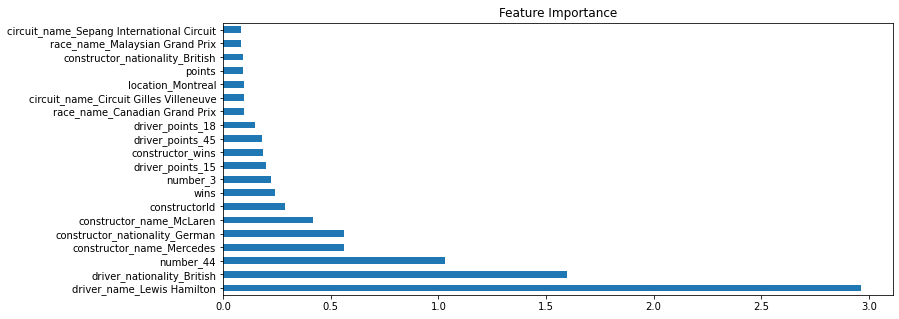

In [110]:
# Model Importance (Logistic Regression)
importance = logreg.coef_[0]
index=X_test_final.columns
# Plot
feature_importances = pd.Series(importance, index = index)
feature_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance',figsize=(12,5),) # Top 20
plt.show()

In [93]:
# Testing other Models (Random Forest Classifier)
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(max_depth = 7)
                                                                       
rf_clf.fit(X_train_final, y_train)

RandomForestClassifier(max_depth=7)

In [94]:
print('train_acc:', rf_clf.score(X_train_final, y_train), 
      '\n test_acc:', rf_clf.score(X_test_final, y_test))

train_acc: 1.0 
 test_acc: 1.0


In [95]:
# Feature Importance
pd.set_option('display.max_colwidth', None) # to display the full text in dataframe
pd.set_option('display.max_rows', None)
pd.concat((pd.DataFrame(X_test.columns, columns = ['feature']), 
           pd.DataFrame(rf_clf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
2,driverId,0.193998
123,NaN,0.171449
114,NaN,0.160167
26,driver_nationality,0.110704
66,NaN,0.050911
76,NaN,0.037000
3,constructorId,0.031721
113,NaN,0.019298
125,NaN,0.014941
28,constructor_points,0.014795


### Report <a name = "report"></a>

### Table of Contents


1. [Introduction](#intro)\
2. [Data Exploration](#eda)\
    1.1 [Which Constructors have performed well?](#eq1)\
    1.2 [Who are the top 5 drivers based on points?](#eq2)\
    1.3 [What is the average finish time for each position?](#eq3)\
    1.4 [Which nationality won the most?](#eq4)\
    1.5 [Does points affect wins for each driver?](#eq5)\
    1.6 [Does qualifying position affect final position?](#eq6)\
    1.7 [Correlation between grid position and finishing position.](#eq7)\
    1.8 [Correlation between points and laps.](#eq8)\
    1.9 [What is the percentage of drivers affected by each status?](#eq9)\
    1.10 [What is the average finishing time for each race?](#eq10)\
    1.11 [What is the average finishing time for each race?](#eq11)\
    1.12 [Culminative points per driver over a season.](#eq12)\
    1.13 [Prediction Problem Statement](#eq13)\
3.  [Data Wrangling on Multiple Tables](#dw)\
    3.1  [Extracting and Creating Features ](#dw1)\
    3.2  [Merging the Tables](#dw2)\
    3.3  [Removing Values and Columns](#dw3)\
4.  [Data Transformation](#dt)\
    4.1  [Handling Outliers & Missing Data](#dt1)\
    4.2  [Categorical Transformation](#dt2)\
    4.3  [Numerical Transformation](#dt3)\
    4.4  [Feature Scaling](#dt4)
5.  [Machine Learning Model](#ml)\
    4.1  [Naïve Baseline Model](#ml1)\
    4.2  [Logistic Regression Model](#ml2)\
6  [Summary & Improvements](#sum)

### Introduction<a name = "intro"></a>

"The future is unpredictable". Although this statement is undoubtably true, why do we still try to predict future events? It is because prediction allows us to anticipate possible futures, which allows us to prepare for potential problems and ultimately decide on the best course of action to achieve a goal. In Data Science, predictions are computed through predictive modeling and analytics. Predictive Analytics, makes use of data wrangling and data transformation techniques, machine learning models and historical data on past events, to formulate a model that can make accurate predictions on future outcomes. 

The data used for the analysis for the report is obtained from Ergast.com, a webservice that provides a database on Formula 1 races. The database includes data from the 1950 season to the current latest season. A data dictionary is also provided to provide further information on the metadata as well as give context to the data.

In this report, I will cover the processes and findings obtained from performing predictive analytics on data from a real-life database. The processes that I will cover in the report will begin with, extracting data from the database. Then, data exploration is done to observe the relationships between the different features, and to construct a prediction problem statement. This prediction problem will serve as the basis for creating a tabular data table from the data, which will then be prepared with data cleansing and transformation techniques for machine learning modeling. The results from the machine learning model is then evaluated, to determine if the model and the data is useful for making accurate predictions based on the constructed prediction problem. This process is then repeated and tested with other methods, to compare and determine which are the most appropriate for the problem.


### Data Exploration <a name = "eda"></a>

To help me better understand the dataset and form the prediction problem statement, Data exploration must be done first. Data exploration is done using a fusion of univariate, bivariate and multivariate analysis, to create visualizations that explore the relationship between the different features in the dataset. 

The purpose of data exploration is to allow me to learn more about the characteristics, patterns, relationships and even the potential problems within the dataset, without having to make any prior assumptions about the data. This allows to better understand the data that I am working with, and more importantly helps me form a prediction problem that will be used when creating and evaluating a machine learning model. Power BI was used to create the visualizations for the data exploration. The relationship between the tables were mapped according to the data dictionary provided.

For further understanding of the data, further research can be done outside of data exploration to better understand the context behind the data that we will be working with. In this case, I did research on Formula One racing as a whole as I am not familiar with Formula One racing. Knowledge on the background information, rules and systems within the motorsport deepened my understanding of the data, which helped me in constructing the prediction problem statement.


### Which Constructors have performed well? <a name = "eq1"></a>

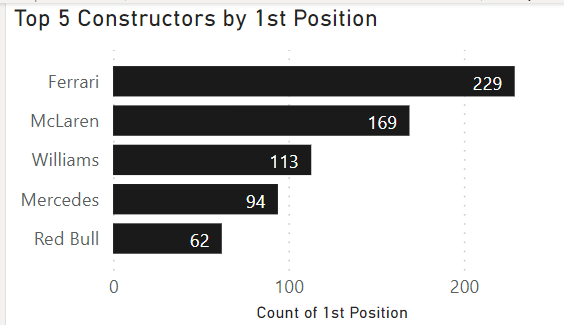

The visualization above is a horizontal bar chart that ranks the top 5 constructors by the total number of first positions that they have obtained. Bar charts allow for easy comparisons between groups and identifying the highest value group. This visualization tells us which constructors have performed the best throughout all the Formula One seasons up to this point, based on the number of first positions attained. This indicates the popularity of the constructor and the preference of the drivers in Formula One. From the visualization, we can see that among the top 5 constructors, Ferrari is at the top when it comes to the number of first positions attained. 

### Who are the top 5 drivers based on points?<a name = "eq2"></a>

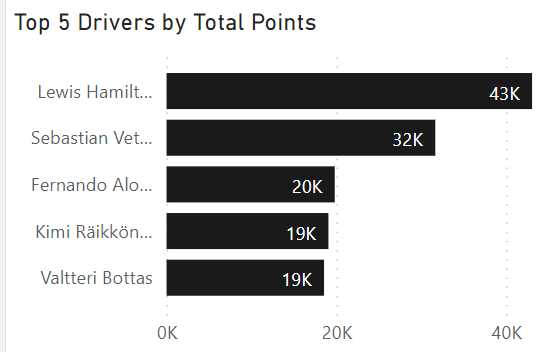

Similar to the previous visualization, the visualization above utilizes a bar chart to rank the top 5 drivers based on their total accumulated points. This visualization helps me see which drivers are the best among the rest, and identify drivers that are of importance based on the total points that they have earned. Points are awarded based on the positions that the driver has obtained from the race. In short, the more points a drivers has, indicates that the driver has placed consistently high for the races they have participated in. This visualization helps me understanding the overall driver standings better, and allows me to observe the relationship between the driver and points.

### What is the average finish time for each position?<a name = "eq3"></a>

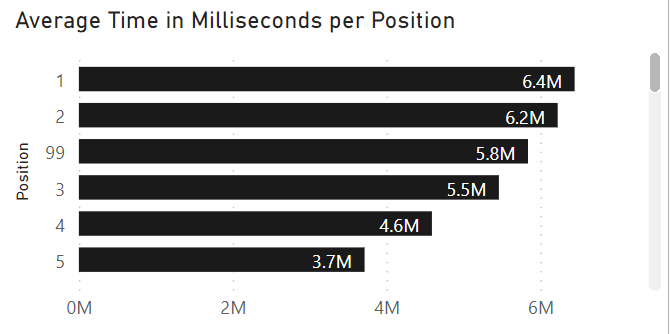

Again, similar to the previous visualizations, the purpose of this visualization is to show the average finishing time for each position. This allows me to evaluate the difference between each position in terms of time in milliseconds, to see if there is a significant amount of time a driver has to overcome to beat the next position. Unfortunately, as the finishing time for each position is not recorded properly in the data, as the visualization above shows that first position has the highest average finishing time even though logically, it should have the lowest average finishing time as the first position would normally finish the race before the other positions. Despite the visualization being incorrect, creating this visualization was helpful as it indicated that the data was incomplete and showed a bias toward the top few positions. This would later be helpful when performing data transformation.

### Which nationality won the most?<a name = "eq4"></a>

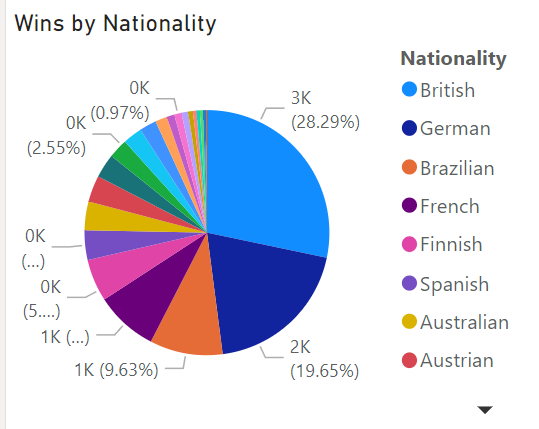

The purpose of the visualization above is to show the wins by each driver’s nationality, which helps me better understand the drivers in the data. This visualization allows me to see whether a driver’s nationality plays a role in whether a race is won, or if there is a certain bias present in the data. This may indicate that certain nationalities are superior to others or better trained. Based on the pie chart above, we can see that the British holds the highest number of wins at 28.29%, followed by Germans at 19.65%.

### Does points affect wins for each driver?<a name = "eq5"></a>

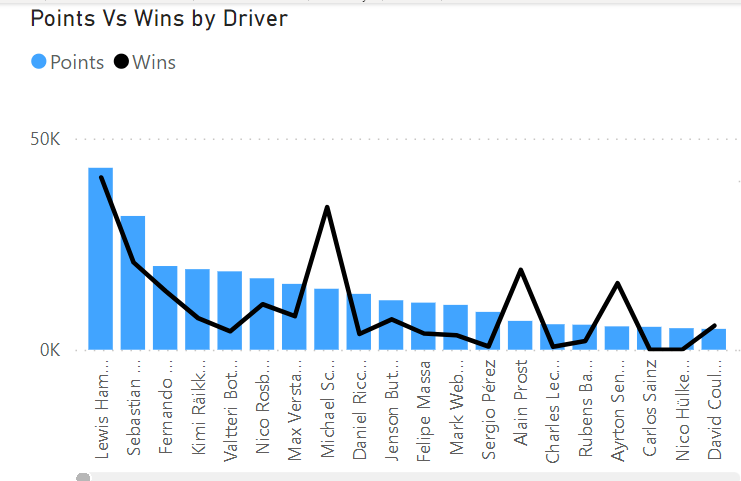

The above visualization shows points compared to the number of wins for each driver. This visualization uses a dual axis line and bar chart to compare the two variables. The purpose of this visual is to see if the number of points a driver has obtained, impacts the number of wins they have. For example, a driver that has a high number of points but a low number of wins shows that they may have consistently gotten a position just below first place. This visualization allows me to better understand the correlation between points and wins and the drivers in the data.

### Does qualifying position affect final position? <a name = "eq6"></a>

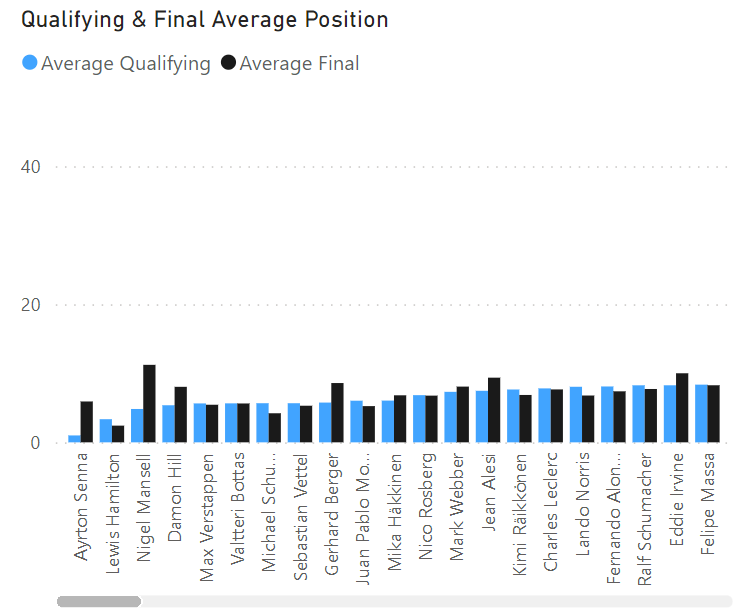

This visualization uses a clustered bar chart to compare the average qualifying position to the average actual position for each driver. The purpose of this visualization is to help be compare the average positions for the qualifying race and the actual race, to determine if a driver’s performance in a qualifying race has any impact on their position for the actual race. Formula One qualifying races determine the starting grid for the actual race. Having a better qualifying position means having a better advantage in the actual race. Thus, I want to see if placing high in the qualifying race, results in the driver placing high in the actual race as well, as it means that the qualifying position can be a useful feature for predicting if a driver places high.

### Correlation between grid position and finishing position.<a name = "eq7"></a>

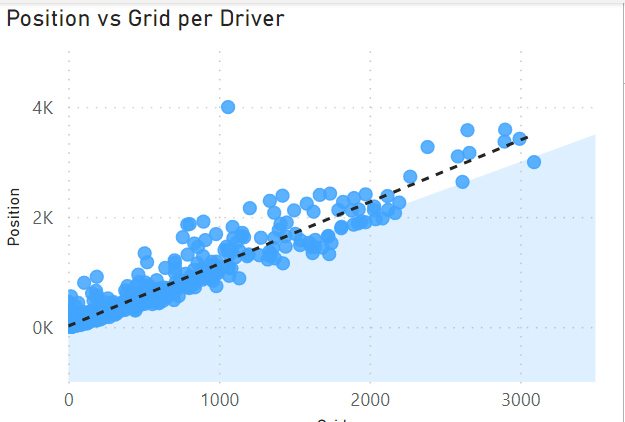

This visualization illustrates the correlation between grid position and finishing position. The purpose of this visualization is to ascertain if grid position has an impact on a driver’s finishing position. Grid position simply refers to the starting position of the cars on the race track. This position is determined through the qualifying races. The fastest driver from the qualifying races is given the pole position, which refers to the position at the front of the start. This may mean that, drivers who obtain the pole position should place in a higher position and have an advantage, as they are starting ahead and do not have to worry about trying to overtake of the other drivers at the start of the race. Based on the trend line drawn on the visualization, the scatter plot shows that gird position and finishing position have a positive correlation. This means that a lower grid position would lead to a lower finishing position.

### Correlation between points and laps.<a name = "eq8"></a>

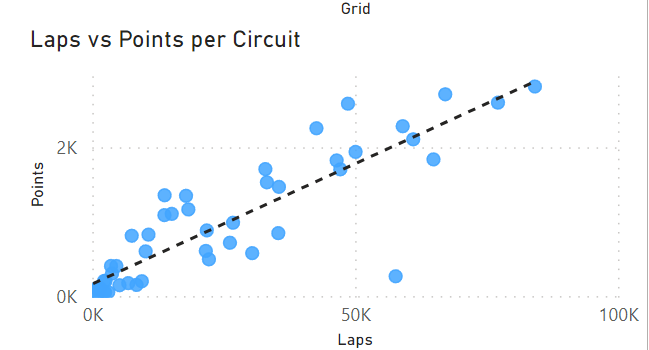

Similar to the previous visualization, the visualization above is a scatter plot that shows the correlation between points and laps for each circuit. The purpose of this scatter plot is to determine if the two variables impact each other, which would help me understand the variables in the dataset better. Points are awarded based on the final position. However, the scatter plot shows that there is a positive correlation between the two variables. This may indicate that some circuits hold more races than others, which would explain the relationship on the visualization. As more races on a particular circuit would be mean a greater number of laps recorded, and a higher number of points awarded.

### What is the percentage of drivers affected by each status?<a name = "eq9"></a>

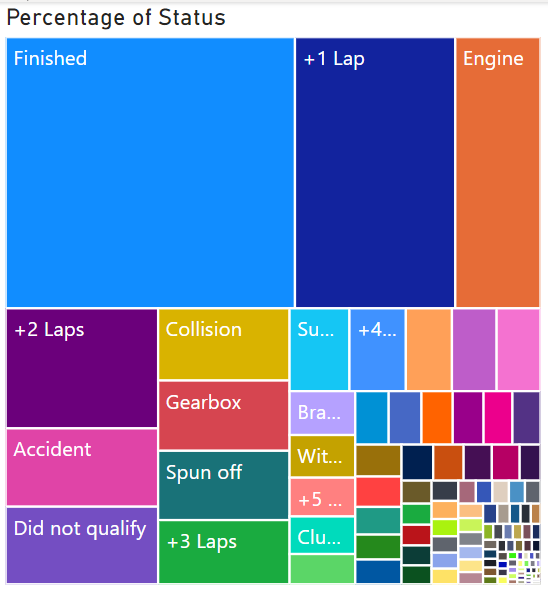

This tree map visualization aims to show the total percentage of drivers affected by each status. These status are based on outcomes that can occur for a driver during a race. The purpose of this tree map is to determine which status have the highest driver percentage and are the most common during the race.

### What is the average finishing time for each driver?<a name = "eq10"></a>

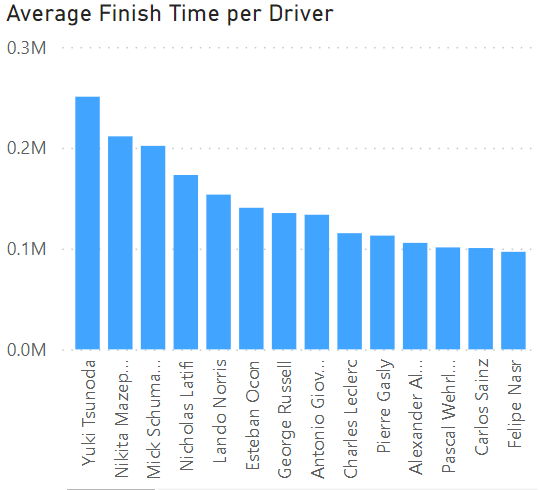

This is another bar chart visualization that illustrates the average finishing time per driver. This is to compare the average finishing time for each driver, and see which drivers perform better than others in a race. A lower average time indicates better performance in the race, while a higher time indicates a worse performance.

### What is the average finishing time for each race?<a name = "eq11"></a>

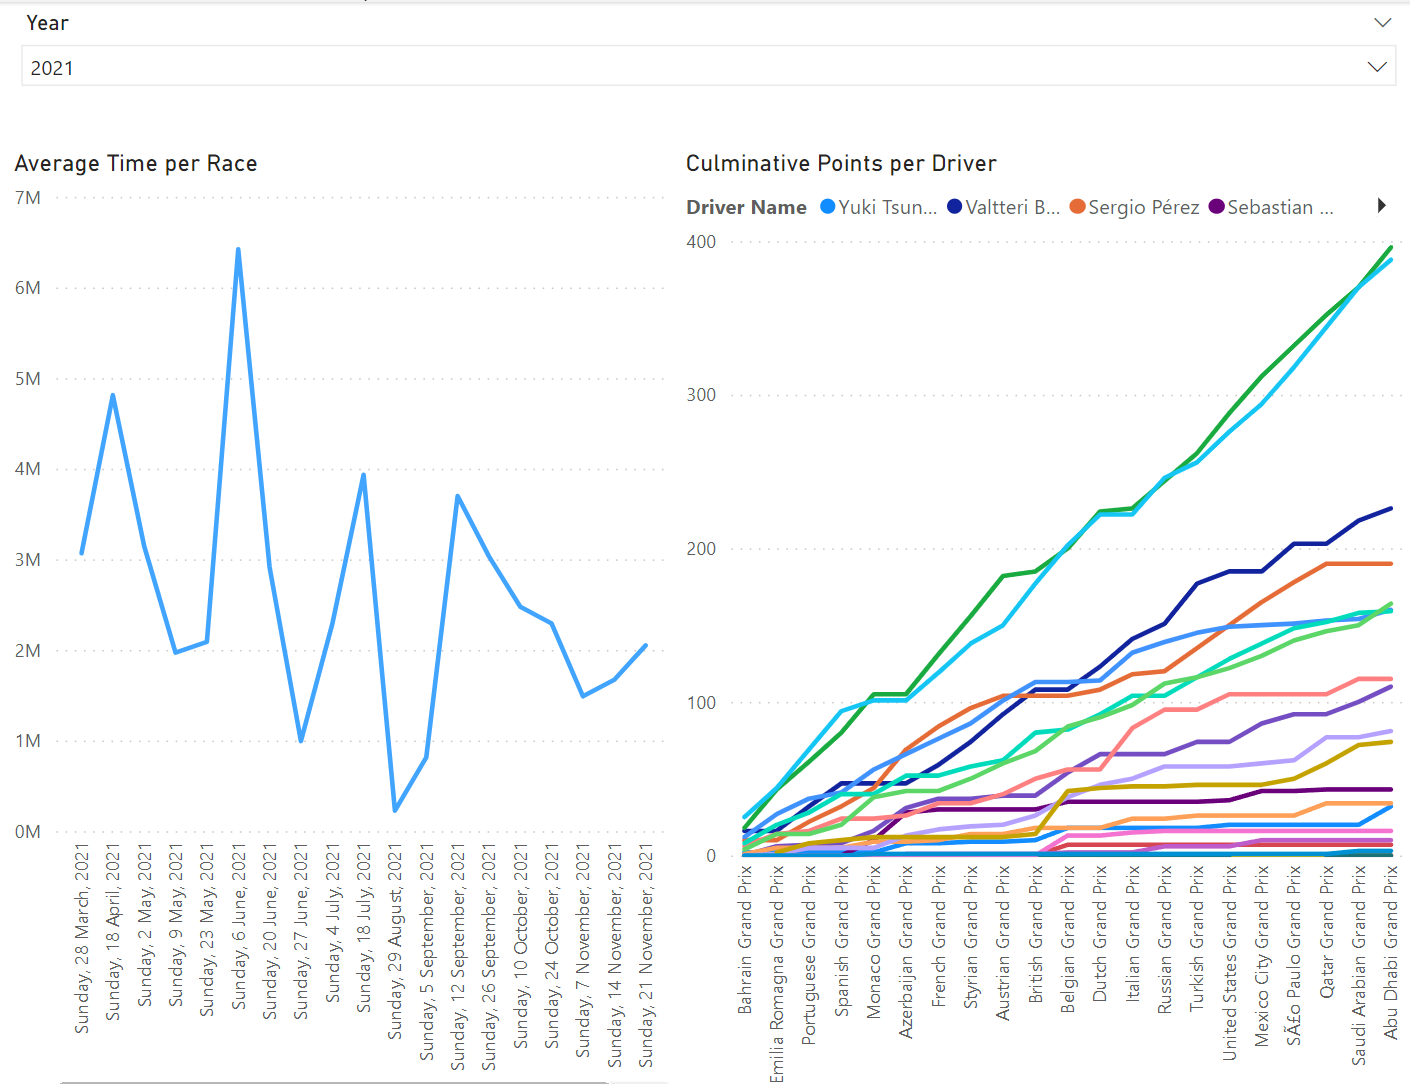

The last two visualizations make use of a year slicer to filter the data by a specific year. This is to improve readability as cramming every single formula one race into a visualization makes the visualization challenging to understand. The visualization above uses a line chart to show the average time taken to finish each race. This lets me see if some circuits during those dates take longer to complete than others.

### Culminative points per driver over a season.<a name = "eq12"></a>

The next visualization is also a line chart that shows the culminative points obtained by each driver throughout the races in the selected year. The purpose of this visualization is to see the increase in points for each driver as the races progress. It tells us each drivers performance based on the points obtained, as well as how consistent they are throughout the year based on the stagnation of the lines in the graph.

### Prediction Problem Statement<a name = "eq13"></a>

Based on my understanding of the data through data exploration and further research done, I was able to formulate a prediction problem of value. The created prediction problem statement is, “Predict if a driver will obtain a podium position for a race”. In other words, build a model to predict whether a driver will finish in the top 3. 

### Data Wrangling on Multiple Tables <a name = "dw"></a>

After completing data exploration and formulating a prediction problem statement, data wrangling on the data has to be performed. Data Wrangling is referred to as the process of combining data sets from various sources and removing the errors within the dataset to make it more appropriate for machine learning. This is a crucial step when working with multiple data sets as data from different sets have to be cleaned and formatted into a consistent and structured dataset. This allows our machine learning model to perform accurately and be useful for solving or predicting values for our prediction problem.

This section of the report will cover, the extraction and creation of new features, merging different tables into a tabular data table, and the removal of specific values and columns to prepare the data appropriately for machine learning modeling.


### Extracting and Creating Features <a name = "dw1"></a>

After loading in the necessary libraries, we first have to load the datasets into Jupyter Notebook. The tables that I have chosen to load into the notebook are chosen based on the previously conducted data exploration, as well as my understanding of the dataset. After running tests and looking at the score of the final model, some tables were removed or added in order to improve the model’s accuracy. The final set of tables/files that I used to create the tabular data is, 
-	results_mod.csv
-	circuits_mod.csv
-	races_mod.csv
-	driver_standings_mod.csv
-	pit_stops_mod.csv
-	constructors_mod.csv
-	qualifying_mod.csv
-	constructor_standings_mod.csv
-	lap_times_mod.csv
-	drivers_mod.csv

After loading in the files, I observed the tables using functions such as ‘.head()’, ‘.info()’ and ‘.describe()’. This is done to get a overview of the raw data and the features present in the tables. From there, based on the data exploration results and my understanding of the data, I identified the features that I found useful and necessary for creating the tabular data table.

Next, I renamed the features that had the same name as the features from other tables. This is to make it easier for me to navigate the data and identify the columns correctly. For example, changing ‘nationality’ from the drivers data into ‘driver_nationality’. While python automatically differentiates columns with the same names by adding ‘.x’ or .’y’ to the column name, I felt that renaming the columns properly would greatly improve the readability of my report.
After merging the dataset, several new features were created.  These features were created to better represent the data in the table, which leads to improved accuracy and a better performing model. The first new feature created was ‘driver_name’ . This feature was created in order to better represent the names of the drivers and reduce the number of columns in the final data table. This feature was created by joining two existing features, ‘forename’ and ‘surname’. This feature will also be crucial to forming the target variable later on. 

Next, I had to format and extract the datetime features from the data. This was needed in order to obtain the pitstop stop time in hours minutes and seconds. During my data exploration, I found that the date column from the ‘races’ dataset had multiple errors present. Some of the years in the dates would have an extra ‘1’ before the year value. I had to first resolve the errors within the date column to be able to convert the column into the datetime data type. To do this, I made use of ‘.unique()’ to show all the unique values present in a column, from there I was able to identify and replace the values that were incorrect with the correct value using ‘.replace({})’. After correcting the error, I combined the ‘date’ column with the ‘stop_time’ column and converted both columns into datetime data type. Combining the columns allowed me to extract the hours, minutes and seconds from the ‘stop_time’ column to create new features, 'stop_time_hours', 'stop_time_minutes' and 'stop_time_seconds'. These columns were created with the intention of improving the model’s performance.

Lastly, I had to create the target variable for my machine learning model. I needed to create a target column as my prediction problem statement is suitable for logistic regression as it aims to predict the probability of an outcome. Logistic Regression models use a categorical target column with values of 1 or 0 to make predictions. Based on the prediction problem, “Predict if a driver will obtain a podium position for a race”, I used Boolean masking to filter out all the rows where their final position is greater than the value 3, only keeping the rows where their position is equal to 1, 2 or 3. Then, I created the ‘Target’ column using ‘np.where()’. The driver name specified will be ‘Lewis Hamilton’ as he is one of the top drivers based on points. The newly created ‘Target’ column will specify a value of 1 when the driver name is ‘Lewis Hamilton’ indicating true, otherwise the value will be 0, which indicates false.


### Merging the Tables<a name = "dw2"></a>

The merging of the various tables was done after renaming the values. Using ‘results_data’ as the base table, the various tables in the dataset were joined to create a tabular data table that would be used for the machine learning model. These tables were joined the function pd.merge() using inner join, and the foreign and primary key values of each table were specified as the left and right join. The selected features were also specified for the join. This ensures that only those features will be taken from the original dataset, to prevent unnecessary features from reducing the accuracy of the model. Inner join was used to prevent many null or NaN values from appearing in the dataset. This is because inner join only joins the two tables when there is a matching value in both tables, which helps to prevent errors with missing or unknown data when performing data transformation later on.

To explain the significance of each table and the values, firstly, we use ‘results_data’ as the base table for our tabular data table. This is because ‘results_data’ contains relevant data that is crucial for predicting the target, such as  ‘position’, ‘grid’ , ‘finish_milliseconds’ and ‘points’. Other tables such as ‘races_data’ are used to provide more information and context to the existing features in the data such as the ‘race_name’,  ‘driver_name’, lap_milliseconds’, ‘country’ and ‘constructor_points’ for example. These features will be used as predictors for the machine learning model to accurately predict future outcomes for the prediction problem statement.


### Removing Values and Columns<a name = "dw3"></a>

Certain values and columns were removed from the dataset to further clean and refine the dataset. Based on the data exploration, there were many values in the data that were specified as ‘\N’. According to the data dictionary, ‘\N’ means that these values aren’t classified and were not recorded in the data. Because my prediction problem is interested in predicting outcome of a driver placing in the top 3, these ‘not classified’ values were not useful for predicting such an outcome. Therefore, I identified the ‘\N’ values present in the features using ‘.unique()’, and then dropped the rows that contained those values using ‘.drop()’. Fortunately, dropping those rows did not reduce the dimensions of my dataset too much, as reducing the dataset too much can end up trivializing the model results.

Even after filtering unnecessary columns from the dataset, I had to drop several more columns from the dataset. This was because these columns were not useful as predictors based on the machine learning model and its feature importance. These columns had little to no impact on the accuracy of the model. Therefore, after testing and confirming the changes in the model, these columns were dropped in favor of reducing the complexity of the model.


### Data Transformation <a name = "dt"></a>

The process of transforming data into a format or structure that is better suited for the model or algorithm, is known as data transformation. It is a crucial process that makes the data structured and formatted for machine learning modeling. Data transformation is needed when working with machine learning modeling as categorical features have to be encoded and numerical features have to be properly handled and scaled for the machine learning model to read the data better, and as a result provide a better and more accurate result.

### Handling Outliers & Missing Data <a name = "dt1"></a>

Most if not all machine learning models do not handle outliers and missing data well.  The reason being that, it is crucial for us to deal with outliers that are discovered in the numerical features in dataset since they can have an effect on the variability of the dataset and the numerical features, which may also increase the error variance. This could have a detrimental impact on the machine learning model's score and decrease the accuracy of our model as skewed data tends to lean toward a bias. Furthermore, most models end up failing if missing data is present. Therefore, it is important to properly handle outliers and missing data in the dataset.

To begin handling the outliers, I had to first examine the distribution of each numerical feature present in the dataset. Using a function to create a diagnostic plot consisting of a histogram, a quantile-quantile (Q-Q) plot and a box plot. These 3 visualizations are essential in helping me easily identify the outliers present in the dataset. After examining the distribution of the numerical features, I was able to identify the outliers. Outliers were found in, 'lap_milliseconds', 'lap_position', 'constructor_wins', 'constructor_points', 'pitstop_milliseconds', 'stop','rank', 'finish_milliseconds', 'points', 'grid', 'position', 'circuitId', 'stop_time_hours', 'fastestLap' and 'qualifying_position'. 

For actually handling the outliers, I utilized capping/censoring to cap the features at their arbitrary maximum and minimum values. This was accomplished using the Winsorizer() function. The "gaussian" capping method was used, which caps the variables using the Gaussian approximation at both ends, using a fold value of 2 as specified in the formula. By doing this, values that are more in line with the variable's average values take the place of the extreme values. Other capping techniques like "quantiles" and "iqr" and even other outlier handling methods like Zero Coding were tested, but no significant impact was made to the model scores, which is why I settled on this method to handle outliers. I used capping instead of trimming to prevent data loss, as losing a large quantity of data makes the model score unrealistic and trivial.
As for the missing data in the dataset, I first checked for any missing data in the dataset using ‘data.isnull().mean().sort_values()’. I found that there were missing values for ‘stop_time_seconds’, ‘stop_time_hours’ and ‘stop_time_minutes’. However, using an imputation pipeline to replace these values with mean or arbitrary values may corrupt the integrity of the original data. Therefore, I decided to just drop these missing values as the amount of missing values were not much, which meant I would not lose much of the dataset.


### Categorical Transformation<a name = "dt2"></a>

Categorical Transformation is an important step in preparing a dataset for machine learning modelling. Categorical features must be transformed into numerical values for the model to comprehend and extract useful data, as most machine learning models only accept numerical variables. This is why categorical transformation techniques such as encoding is used.
One-Hot encoding was the method used for encoding the categorical features in my dataset. I also specified the top categories as 10 to return a greater number of encoded features which gives the data more predictors to work with. One-hot encoding creates a new categorical column for each categorical value, then gives each column a binary value of 1 or 0 depending on the index. As there is a large number of unique categorical values present in each categorical feature, performing one-hot encoding on every value would cause the dataset to become fragmented, which is the result of calling ‘frame.insert’ too many times due to the high number of categories. A fragmented dataset can cause your model to perform poorly and can result in overfitting.

Other encoding methods were tested on the dataset, but I found that they made no significant difference to the final model score. Methods such as ordinal encoding are more suited for non-linear models. However, the model that I will be using is a logistic regression model, which is a linear model, and thus ordinal encoding would not be useful. I also did not make use of Label Encoder, as to my knowledge, this encoder is used on target variables or the y values instead of the x values, which is why I did not make use of this encoder.


### Numerical Transformation<a name = "dt3"></a>

Utilizing methods to scale down the numerical features is known as numerical transformation or normalizing. When numerical data has been scaled and become regularly distributed, many machine learning models tend to perform better.
For typical logistic regression models, the numerical values actually do not need to be standardized and normalized. However, as I am making use of the logistic regression from scikit-learn, I have to test and implement scaling and normalization on the dataset. As the logistic regression model in scikit-learn makes use of regularization, which makes the predictors dependent on the scale of the features. Therefore, I have to try and test the model with and without scaling and normalization to compare the results and use the method that produces the best result.

The final method used was using power transformer with an exponent of 1/3 to perform the numerical transformation. Power transformation typically make the distribution of the data more “gaussian” or normal. I used this transformer as it could be applied to positive, negative and zero values making it more applicable than the other transformation methods.
Log transformer, Box-Cox transformer and Square/Cube root transformers could not be used as the dataset contained zero or negative values. Therefore, these transformers were not implemented. Reciprocal function transformation was also not applicable for this particular dataset as there were zero values in the data, which causes the transformer to return an error.

The final transformation method tested was the YeoJohnson transformation method,  an extension of the Box-Cox transformation method. This method worked on dataset because the transformer was able to handle negative and zero values. The model’s score was not impacted. But, in the end I chose to use power transformer as I felt the scaling was better.
I also performed variable discretization on the dataset. This was done to reduce the impact of outliers and alter the distribution of skewed variables. Discretization is done by transforming continuous variables into discrete variables. I chose to perform discretization as, it helped to scale down the data, which can improve model performance as it limits the amount of variability in the data.


### Feature Scaling<a name = "dt4"></a>

Similar to the numerical transformation done on the dataset, feature scaling uses the same principle of standardizing and scaling the data. This is to ensure that the values in the features are similarly significant, otherwise it will increase the amount of variability in the data, which can affect the performance and score of your model.

The feature scaling used is Standard Scaling. This method scales each feature by standardizing each feature by removing its mean and scaling it to the unit variance. After scaling, a kernel density plot is constructed to observe the changes in the distribution of the features. This allows us to compare the changes made to the distribution and decide if we want to use feature scaling. Based on the kernel density plot created, we can see that feature scaling has greatly affected the distribution of the features. Which can have an impact on the model’s performance. I used standard scaler as the graph shows that it returns the most similarly scaled features, which is important when using logistic regression from scikit-learn.


### Machine Learning Model <a name = "ml"></a>

Lastly, I built and evaluated a machine learning model. As mentioned earlier in the report, I made use of scikit-learn’s logistic regression model to train and test my data. On top of that, I also made use of another machine learning model, random forest classifier, that also uses categorical target variables. After modeling the data, I obtained the coefficients for each feature in the model and displayed each feature and its importance to the machine learning model. This allowed be to identify features that are useful and not useful, allowing me to remove the unnecessary features from my dataset. However, before I begin modelling, I had to ensure that the number of rows and columns in my dataset were of sufficient quantity to ensure that my predicted results and scores are not trivial or unrealistic.

### Naïve Baseline Model<a name = "ml1"></a>

Before, I actual input my data into a machine learning model, I first had to build a naïve baseline mode. A naïve baseline model, is a simple classification model that assumes nothing about the prediction problem and predicts and returns a score based on the mean of your target variable. This model acts as a baseline to compare and evaluate the actual results to. This means that the model has to perform at least better than this model to even be useful for prediction. 
The score obtained from my naïve baseline model on the data is,
- The Naive Baseline Model's MSE on train data is 0.15.
- The Naive Baseline Model's MSE on test data is 0.15.
- The Naive Baseline Model's RMSE on train data is 0.39.
- The Naive Baseline Model's RMSE on test data is 0.39.
- The Naive Baseline Model's R2 on train data is -0.00.
- The Naive Baseline Model's R2 on test data is -0.00.


### Logistic Regression<a name = "ml2"></a>

A logistic regression model is a supervised machine learning model that predicts the probability of one out of two outcomes based on the scope of your prediction problem. Logistic Regression is used as my prediction problem statement is interested in a specific outcome. These outcomes can be categorized into binary values 1 and 0. This makes logistic regression suitable for the type of prediction problem I am doing. The model is simply built by importing the model from scikit-learn and fitting it onto the test and train data. I specified the max iterations as 300 as the default number was insufficient for the size of the dataset used.
The scores obtained from the model are,
-	The LogReg Model's MSE on train data is 0.0000.
-	The LogReg Model's MSE on test data is 0.0000.
-	The LogReg Model's RMSE on train data is 0.0000.
-	The LogReg Model's RMSE on test data is 0.0000.
-	The LogReg Model's R2 on train data is 1.0000.
-	The LogReg Model's R2 on test data is 1.0000.
Now, the score shown above indicates that the modeling is perfect and there is no error for the prediction. However, this is highly unlikely for a real-life dataset. What I believe is occurring here is data leakage. Data leakage refers to the use of information that is not available at the time of prediction, thus causing the model to overfit the data which causes a perfect score. This means that while I might have a 100% accuracy for this set of data, the actual accuracy of may be much lower than expected, causing these result here to be utterly pointless. The other machine learning model, random forest classifier, also returned similar results which indicates that the data from train my have indeed been leaked into the test data. While I have tried to identify and resolve this issue, I was ultimately unable to at the time of writing this report. 


### Summary & Improvements <a name = "sum"></a>

Overall, while the data exploration results and prediction problem was of value, the evaluated machine learning model was not of any value for the problem as the model itself would not succeed in predicting the outcomes for the prediction problem, “Predict if a driver will obtain a podium position for a race”.  Again, this is due to data leakage, which can be attributed to carelessness and poor time management, as I was not able to identify the feature or method used that caused the data leakage.
Improvements can definitely be made. Obviously the biggest improvement and change would be to actually resolve the data leakage issue and obtain a score that is more indicative of the data used and train a model that is actually useful for prediction in a real-life scenario. Next is understanding the data better. The cause of the data leakage may have been due to my lack of understanding on the data, which means more research and more meaningful data exploration should be done to deepen my understanding of the data. Lastly, is to use different combinations of data and methods. I was not able to try every single method and try merging every combination of the data. Trying a different approach or exploring other predictors and features might have given me a solution to the data leak problem. This concludes my report on the data wrangling assignment 2.
